# Import / Загрузка библиотек

In [382]:
# Data Processing and Visualization Libraries / Библиотеки обработки данных и визуализации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Data Modelling Libraries / Библиотеки моделирования данных
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)


from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
from collections import Counter


sns.set(style = 'white' , context = 'notebook', palette = 'deep')
warnings.filterwarnings('ignore', category = DeprecationWarning)
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Загрузка данных

In [383]:
# load the datasets 

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [384]:
# Забираем таргет для обучающей выборки
target = train['Survived']

# concat these two datasets, this will come handy while processing the data / 
#объедините эти два набора данных, это пригодится при обработке данных

dataset =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

# separately store ID of test datasets, 
# this will be using at the end of the task to predict.
#отдельно храните идентификатор тестовых наборов данных,
# это будет использоваться в конце задачи для прогнозирования.

TestPassengerID = test['PassengerId']


In [385]:
# Сведения о размерах выборок
print("Размеры обучающей выборки",train.shape)
print("Размеры тестовой выборки ",test.shape)

Размеры обучающей выборки (891, 12)
Размеры тестовой выборки  (418, 11)


## Описание признаков (Kagle)

=PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
==Пассажиры. Уникальная идентификация пассажира. Это не должно быть необходимо для модели машинного обучения.

=Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
==Выжил. Выживание (0 = Нет, 1 = Да). Двоичная переменная, которая будет нашей целевой переменной.

=Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
==Класс. Класс билета (1 = 1-й, 2 = 2-й, 3 = 3-й). Готов к выходу.

=Name. Name of the passenger. We need to parse before using it.
==Имя. Имя пассажира. Нам нужно проанализировать, прежде чем использовать его.

=Sex. Gender Categorical variable that should be encoded. We can use dummy variable to encode it.
== Пол. Гендерная категориальная переменная, которая должна быть закодирована. Мы можем использовать фиктивную переменную для ее кодирования.

=Age. Age in years.
==Возраст. Возраст в годах

=SibSp. Siblings / Spouses aboard the Titanic.
== Подсп. Братья и сестры / Супруги на борту "Титаника"

=Parch. Parents / Children aboard the Titanic.
== Пергамент. Родители / Дети на борту "Титаника"

=Ticket. Ticket number. Big mess.
== Билет. Номер билета. Большой беспорядок

=Fare. Passenger fare.
== Плата за проезд. Стоимость проезда для пассажиров

=Cabin. Cabin number.
==Каюта. Номер каюты

=Embarked. Port of Embarkation , C = Cherbourg, Q = Queenstown, S = Southampton.
==Встал. Порт посадки , C = Шербур, Q = Квинстаун, S = Саутгемптон.

=Categorical feature that should be encoded. We can use feature mapping or make dummy vairables for it.
==Категориальный признак, который должен быть закодирован. Мы можем использовать отображение объектов или создавать для него фиктивные переменные.

In [386]:
# using info method we can get quick overview of the data sets
# используя метод информации, мы можем получить быстрый обзор наборов данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Анализ признаков

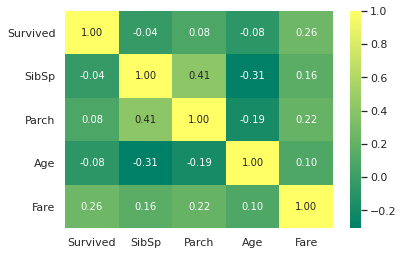

In [387]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
# Матрица корреляции между числовыми значениями (возраст и  стоимость) и выжившими
corr_numeric = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare", "Embarked"]].corr(),
                           annot=True, fmt = ".2f", cmap = "summer")

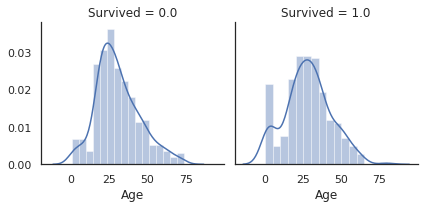

In [388]:
# Explore the Age vs Survived features
# Исследуйте особенности возраста и выживших
age_survived = sns.FacetGrid(dataset, col='Survived')
age_survived = age_survived.map(sns.distplot, "Age")

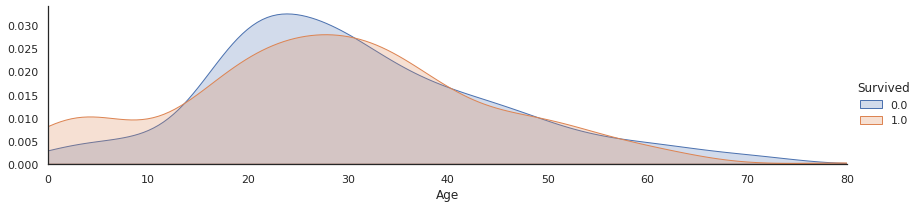

In [389]:
fig = sns.FacetGrid(dataset, hue = 'Survived', aspect = 4)
fig.map(sns.kdeplot, 'Age' , shade = True)
fig.set(xlim = (0, dataset['Age'].max()))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


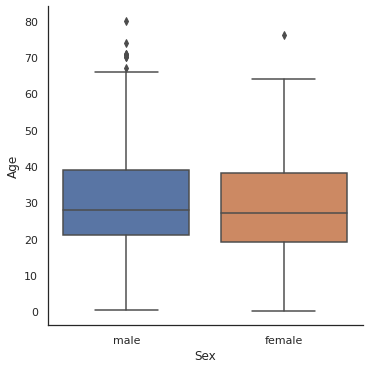

In [390]:
# visualize this using box plot
AS = sns.factorplot(y="Age", x="Sex", data = dataset, kind="box")

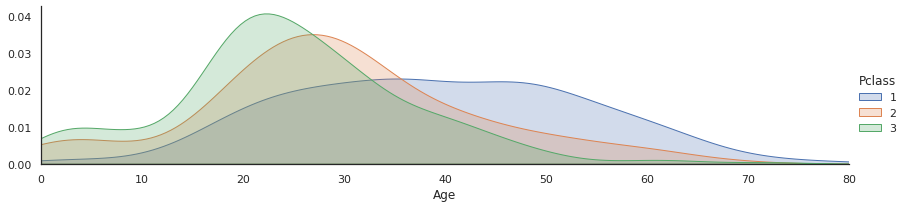

In [391]:
facet = sns.FacetGrid(dataset, hue="Pclass", aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

# Анализ пропусков в наборах данных

<AxesSubplot:>

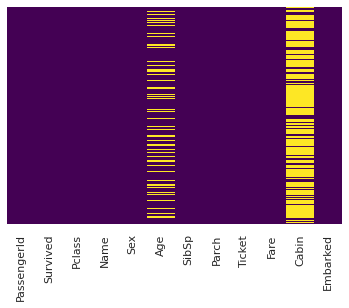

In [392]:
# визуализация пропуков в обучающей выборке
# checking only train set - visualize
sns.heatmap(train.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

<AxesSubplot:>

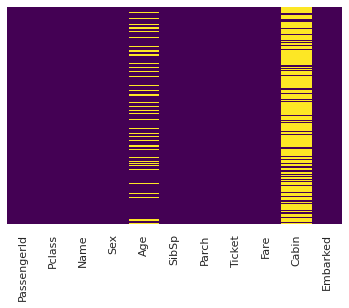

In [393]:
# визуализация пропуков в общем наборе данных
# checking only datasets set
sns.heatmap(test.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

<AxesSubplot:>

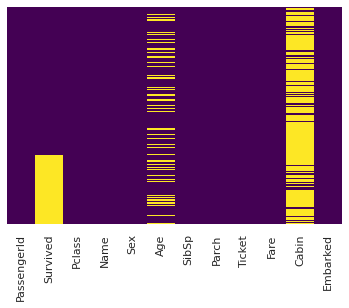

In [394]:
# визуализация пропуков в общем наборе данных
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

In [395]:
# функция поиска недостающих данных
def find_missing_data(data):
    Total = data.isnull().sum().sort_values(ascending = False)
    Percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
    
    return pd.concat([Total, Percentage] , axis = 1 , keys = ['Total' , 'Percent'])

In [396]:
find_missing_data(dataset)

,Total,Percent
Cabin,1014,0.774637
Survived,418,0.319328
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


Обнаруживается большое колличество пропусков по размещению пассажиров.
У многих отсутвуют данные о возрасте
Лишь у двоих неизвестен порт отправления.
Это связывается с большим количеством пассажиров низкого класса, которые не учитывались при покупке билетов и регистрации.

В данном ноутбуке не будут учитываться признаки Cabin и  Ticket. При этом не исклчается, что этот призанк важный. Так же отброшен признак 

Для признаков Age Embarked Fare пропуски будут заполнены средним значением

# Заполнение пропусков в общем датасете

In [397]:
dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [398]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [399]:
numeric_cols = ['Age', 'Fare']
categorical_cols = ['Name', 'Sex', 'Embarked']
print('численные признаки:     ', numeric_cols)
print('вещественные признаки:  ', categorical_cols)

численные признаки:      ['Age', 'Fare']
вещественные признаки:   ['Name', 'Sex', 'Embarked']


### Обработка пропущенных значений.

<AxesSubplot:>

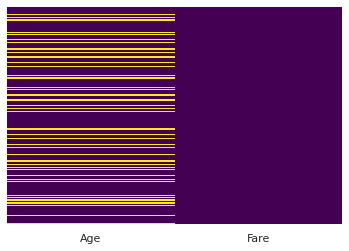

In [400]:
# визуализация пропуков в общем наборе данных до заполнения
# checking only datasets set
sns.heatmap(dataset[numeric_cols].isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

In [401]:
# заполнем пропуски численных признаков средним значением по признаку

X_real_mean = dataset[numeric_cols].fillna(round(np.mean(dataset[numeric_cols]),0))


In [402]:
# добавим численные признаки в общий набор данных
dataset[numeric_cols]=X_real_mean[numeric_cols]

До заполнения  (1309, 2)
После заполенения  (1309, 12)


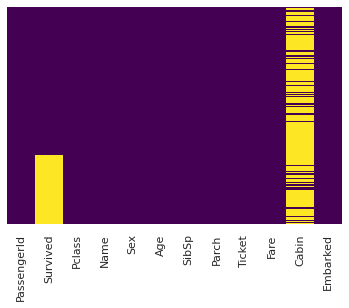

In [403]:
# визуализация пропуков в общем наборе данных
# checking only datasets set
sns.heatmap(dataset.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

print("До заполнения ",dataset[numeric_cols].shape)
print("После заполенения ",dataset.shape)

## Преобразование категориальных признаков.

In [404]:
# закодируем котегориальные признаки 

dataset.loc[dataset['Sex'] == 'male', 'Sex'] = int(0)
dataset.loc[dataset['Sex'] == 'female', 'Sex'] = int(1)
dataset.loc[dataset['Embarked'] == 'S', 'Embarked'] = 0
dataset.loc[dataset['Embarked'] == 'C', 'Embarked'] = 1
dataset.loc[dataset['Embarked'] == 'Q', 'Embarked'] = 2
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [405]:
dataset[['Sex', 'Embarked']] = dataset[['Sex', 'Embarked']].astype(float)

In [406]:
# проверим тип закодированных признаков
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   float64
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   float64
dtypes: float64(5), int64(4), object(3)
memory usage: 122.8+ KB


## Обработка имен пассажиров

In [407]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in dataset["Name"]]

# add dataset_title to the main dataset named 'Title'
dataset["Title"] = pd.Series(dataset_title)

# count
dataset["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Don               1
Lady              1
Dona              1
Capt              1
Sir               1
the Countess      1
Jonkheer          1
Mme               1
Name: Title, dtype: int64

In [408]:
# Convert to categorical values Title 
# Преобразовать в роства категориальных значений
dataset["Title"] = dataset["Title"].replace(['Lady', 'the Countess',
                                             'Capt', 'Col','Don', 'Dr', 
                                             'Major', 'Rev', 'Sir', 'Jonkheer',
                                             'Dona'], 'Rare')

dataset["Title"] = dataset["Title"].map({"Master":0, "Miss":1, "Ms" : 1 ,
                                         "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, 
                                         "Rare":3})

dataset["Title"] = dataset["Title"].astype(int)

# Drop Name variable
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [409]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   float64
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   float64
 11  Title        1309 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 122.8+ KB


## Колличество членов в семье

In [410]:
# Create a family size descriptor from SibSp and Parch
# Создание размера семейства из SibSp и Parch
dataset["Famize"] = dataset["SibSp"] + dataset["Parch"] + 1

# Drop SibSp and Parch variables
dataset.drop(labels = ["SibSp",'Parch'], axis = 1, inplace = True)
dataset

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Famize
0,1,0.0,3,0.0,22.0,A/5 21171,7.2500,NaN,0.0,2,2
1,2,1.0,1,1.0,38.0,PC 17599,71.2833,C85,1.0,1,2
2,3,1.0,3,1.0,26.0,STON/O2. 3101282,7.9250,NaN,0.0,1,1
3,4,1.0,1,1.0,35.0,113803,53.1000,C123,0.0,1,2
4,5,0.0,3,0.0,35.0,373450,8.0500,NaN,0.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,0.0,30.0,A.5. 3236,8.0500,NaN,0.0,2,1
1305,1306,NaN,1,1.0,39.0,PC 17758,108.9000,C105,1.0,3,1
1306,1307,NaN,3,0.0,38.5,SOTON/O.Q. 3101262,7.2500,NaN,0.0,2,1
1307,1308,NaN,3,0.0,30.0,359309,8.0500,NaN,0.0,2,1


In [411]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Famize
0,1,0.0,3,0.0,22.0,A/5 21171,7.2500,NaN,0.0,2,2
1,2,1.0,1,1.0,38.0,PC 17599,71.2833,C85,1.0,1,2
2,3,1.0,3,1.0,26.0,STON/O2. 3101282,7.9250,NaN,0.0,1,1
3,4,1.0,1,1.0,35.0,113803,53.1000,C123,0.0,1,2
4,5,0.0,3,0.0,35.0,373450,8.0500,NaN,0.0,2,1


In [412]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   float64
 4   Age          1309 non-null   float64
 5   Ticket       1309 non-null   object 
 6   Fare         1309 non-null   float64
 7   Cabin        295 non-null    object 
 8   Embarked     1309 non-null   float64
 9   Title        1309 non-null   int64  
 10  Famize       1309 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 112.6+ KB


In [413]:
arr=dataset.Cabin.unique()
arr

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [414]:
dataset.Cabin = dataset.Cabin.fillna(0)


In [415]:
dataset['Cabin']=dataset['Cabin'].replace(to_replace =arr[1:], value =1)

In [416]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Famize
0,1,0.0,3,0.0,22.0,A/5 21171,7.2500,0,0.0,2,2
1,2,1.0,1,1.0,38.0,PC 17599,71.2833,1,1.0,1,2
2,3,1.0,3,1.0,26.0,STON/O2. 3101282,7.9250,0,0.0,1,1
3,4,1.0,1,1.0,35.0,113803,53.1000,1,0.0,1,2
4,5,0.0,3,0.0,35.0,373450,8.0500,0,0.0,2,1


In [417]:
dataset = dataset.drop(['Ticket'], axis = 1)
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famize
0,1,0.0,3,0.0,22.0,7.2500,0,0.0,2,2
1,2,1.0,1,1.0,38.0,71.2833,1,1.0,1,2
2,3,1.0,3,1.0,26.0,7.9250,0,0.0,1,1
3,4,1.0,1,1.0,35.0,53.1000,1,0.0,1,2
4,5,0.0,3,0.0,35.0,8.0500,0,0.0,2,1


In [418]:
dataset = dataset.drop(['PassengerId','Survived'], axis = 1)
dataset.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famize
0,3,0.0,22.0,7.2500,0,0.0,2,2
1,1,1.0,38.0,71.2833,1,1.0,1,2
2,3,1.0,26.0,7.9250,0,0.0,1,1
3,1,1.0,35.0,53.1000,1,0.0,1,2
4,3,0.0,35.0,8.0500,0,0.0,2,1


# Подготовка обучающей и тестовой выборок

In [419]:
# Separate train dataset and test dataset
train_new = dataset[:len(train)]
print('размер обучающей выборки ^',train_new.shape)
test_new = dataset[len(train):]

print('размер тестовой выборки ^',test_new.shape)
test_new


размер обучающей выборки ^ (891, 8)
размер тестовой выборки ^ (418, 8)


,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famize
891,3,0.0,34.5,7.8292,0,2.0,2,1
892,3,1.0,47.0,7.0000,0,0.0,1,2
893,2,0.0,62.0,9.6875,0,2.0,2,1
894,3,0.0,27.0,8.6625,0,0.0,2,1
895,3,1.0,22.0,12.2875,0,0.0,1,3
...,...,...,...,...,...,...,...,...
1304,3,0.0,30.0,8.0500,0,0.0,2,1
1305,1,1.0,39.0,108.9000,1,1.0,3,1
1306,3,0.0,38.5,7.2500,0,0.0,2,1
1307,3,0.0,30.0,8.0500,0,0.0,2,1


In [420]:
# Separate train features and label 
Y_train = target
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [421]:
X_train = train_new
X_train

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famize
0,3,0.0,22.0,7.2500,0,0.0,2,2
1,1,1.0,38.0,71.2833,1,1.0,1,2
2,3,1.0,26.0,7.9250,0,0.0,1,1
3,1,1.0,35.0,53.1000,1,0.0,1,2
4,3,0.0,35.0,8.0500,0,0.0,2,1
...,...,...,...,...,...,...,...,...
886,2,0.0,27.0,13.0000,0,0.0,3,1
887,1,1.0,19.0,30.0000,1,0.0,1,1
888,3,1.0,30.0,23.4500,0,0.0,1,4
889,1,0.0,26.0,30.0000,1,1.0,2,1


In [422]:
test_new

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Famize
891,3,0.0,34.5,7.8292,0,2.0,2,1
892,3,1.0,47.0,7.0000,0,0.0,1,2
893,2,0.0,62.0,9.6875,0,2.0,2,1
894,3,0.0,27.0,8.6625,0,0.0,2,1
895,3,1.0,22.0,12.2875,0,0.0,1,3
...,...,...,...,...,...,...,...,...
1304,3,0.0,30.0,8.0500,0,0.0,2,1
1305,1,1.0,39.0,108.9000,1,1.0,3,1
1306,3,0.0,38.5,7.2500,0,0.0,2,1
1307,3,0.0,30.0,8.0500,0,0.0,2,1


In [423]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(801, 8)
(90, 8)
(801,)
(90,)


In [424]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    801 non-null    int64  
 1   Sex       801 non-null    float64
 2   Age       801 non-null    float64
 3   Fare      801 non-null    float64
 4   Cabin     801 non-null    int64  
 5   Embarked  801 non-null    float64
 6   Title     801 non-null    int64  
 7   Famize    801 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 56.3 KB


## Classifier

## Building the XGBoost Model

In [425]:
import xgboost as xgb


xg_clf = xgb.XGBClassifier(objective ='binary:logistic',
                           use_label_encoder=False,
                           colsample_bytree=0.4,
                           learning_rate = 0.1,
                          max_depth = 6,  
                          n_estimators = 26
                          )

In [426]:
xg_clf.fit(X_train,Y_train)

[15:57:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=26, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [427]:
K_fold = 10

In [428]:
# Logistic Regression
#
 #Log_Model = LogisticRegression(C=1)
#scores = cross_val_score(Log_Model, X_train, Y_train, cv=K_fold, 
 
#print(scores)
#round(np.mean(scores)*100, 2)

In [429]:
# Random Forest Classifier Model
#
RFC_model = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(RFC_model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.81481481 0.825      0.85       0.8125     0.8625     0.8125
 0.7875     0.7125     0.775      0.85      ]


81.02

In [430]:
# Gaussian Naive Bayes
GNB_Model = GaussianNB()

scores = cross_val_score(GNB_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.77777778 0.775      0.7125     0.7875     0.7875     0.7375
 0.8625     0.775      0.8875     0.8375    ]


79.4

In [431]:
# Support Vector Machine
SVM_Model = SVC()

scores = cross_val_score(SVM_Model, X_train, Y_train, cv=K_fold, 
                        n_jobs=4, scoring='accuracy')

print(scores)
round(np.mean(scores)*100, 2)

[0.74074074 0.675      0.6        0.725      0.6875     0.725
 0.6375     0.65       0.675      0.65      ]


67.66

# Hyperparameter Tuning

In [432]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gsGBC = GridSearchCV(GBC, param_grid = gb_param_grid, cv=K_fold, 
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


0.8377006172839506

In [433]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)
RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


0.8402314814814815

In [434]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression()

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2"],
              "tol" : [0.0001,0.0002,0.0003],
              "max_iter": [100,200,300],
              "C" :[0.01, 0.1, 1, 10, 100],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear'],
              "verbose":[1]}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLRM.fit(X_train,Y_train)
LRM_best = gsLRM.best_estimator_

# Best score
gsLRM.best_score_

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
iter  1 act 4.690e-01 pre 4.377e-01 delta 2.840e-02 f 4.991e+00 |g| 3.323e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.540e-02 pre 6.311e-02 delta 5.418e-02 f 4.522e+00 |g| 8.830e+00 CG   3
cg reaches trust region boundary
iter  3 act 6.918e-02 pre 6.869e-02 delta 1.628e-01 f 4.456e+00 |g| 2.123e+00 CG   2
cg reaches trust region boundary
iter  4 act 1.683e-01 pre 1.694e-01 delta 3.300e-01 f 4.387e+00 |g| 3.136e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.835e-01 pre 1.832e-01 delta 4.782e-01 f 4.219e+00 |g| 1.279e+00 CG   3
iter  1 act 4.703e-01 pre 4.386e-01 delta 2.898e-02 f 4.998e+00 |g| 3.265e+01 CG   2
cg reaches trust region boundary
iter  6 act 3.121e-02 pre 3.115e-02 delta 4.782e-01 f 4.035e+00 |g| 3.944e-01 CG   5
iter  7 act 5.681e-05 pre 5.678e-05 delta 4.782e-01 f 4.004e+00 |g| 4.929e-02 CG   4
iter  2 act 6.723e-02 pre 6.523e-02 delta 5.732e-02 f 4.527e+00 |g| 8.364e+00 CG   3
iter 

iter  6 act 3.121e-02 pre 3.115e-02 delta 4.782e-01 f 4.035e+00 |g| 3.944e-01 CG   5
iter  6 act 1.702e-01 pre 1.700e-01 delta 4.323e-01 f 4.189e+00 |g| 1.242e+00 CG   3
iter  7 act 5.681e-05 pre 5.678e-05 delta 4.782e-01 f 4.004e+00 |g| 4.929e-02 CG   4
iter  7 act 3.229e-02 pre 3.230e-02 delta 4.323e-01 f 4.019e+00 |g| 7.362e-01 CG   4
iter  8 act 4.649e-06 pre 4.649e-06 delta 4.782e-01 f 4.004e+00 |g| 4.079e-03 CG   5
iter  8 act 4.418e-04 pre 4.417e-04 delta 4.323e-01 f 3.987e+00 |g| 9.497e-02 CG   4
iter  9 act 2.850e-06 pre 2.850e-06 delta 4.323e-01 f 3.987e+00 |g| 3.505e-03 CG   5
iter  1 act 5.431e-01 pre 4.979e-01 delta 3.080e-02 f 4.998e+00 |g| 3.619e+01 CG   2
cg reaches trust region boundary
iter  2 act 8.498e-02 pre 8.030e-02 delta 5.143e-02 f 4.454e+00 |g| 1.163e+01 CG   3
cg reaches trust region boundary
iter  3 act 6.439e-02 pre 6.367e-02 delta 1.315e-01 f 4.370e+00 |g| 2.752e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.435e-01 pre 1.444e-01 delta 3.177e-01

iter  1 act 5.200e-01 pre 4.785e-01 delta 3.013e-02 f 4.998e+00 |g| 3.520e+01 CG   2
cg reaches trust region boundary
iter  2 act 8.019e-02 pre 7.591e-02 delta 5.128e-02 f 4.478e+00 |g| 1.096e+01 CG   3
cg reaches trust region boundary
iter  3 act 6.235e-02 pre 6.154e-02 delta 1.206e-01 f 4.397e+00 |g| 2.620e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.333e-01 pre 1.343e-01 delta 2.898e-01 f 4.335e+00 |g| 3.237e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.813e-01 pre 1.803e-01 delta 4.643e-01 f 4.202e+00 |g| 1.215e+00 CG   3
iter  6 act 5.592e-02 pre 5.607e-02 delta 4.643e-01 f 4.021e+00 |g| 5.352e-01 CG   4
iter  7 act 6.622e-04 pre 6.621e-04 delta 4.643e-01 f 3.965e+00 |g| 1.263e-01 CG   4
iter  8 act 2.117e-05 pre 2.116e-05 delta 4.643e-01 f 3.964e+00 |g| 1.148e-02 CG   5
iter  1 act 4.941e-01 pre 4.578e-01 delta 2.889e-02 f 4.998e+00 |g| 3.477e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.247e-02 pre 6.935e-02 delta 5.260e-02 f 4.503e+00 |g| 9.

cg reaches trust region boundary
iter  4 act 2.078e-01 pre 2.055e-01 delta 3.451e-01 f 4.377e+00 |g| 2.307e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.342e-01 pre 1.384e-01 delta 3.451e-01 f 4.169e+00 |g| 1.000e+00 CG   3
iter  6 act 4.168e-02 pre 4.080e-02 delta 3.451e-01 f 4.035e+00 |g| 8.079e-01 CG   4
iter  7 act 3.330e-04 pre 3.328e-04 delta 3.451e-01 f 3.993e+00 |g| 1.020e-01 CG   4
iter  8 act 1.847e-05 pre 1.847e-05 delta 3.451e-01 f 3.993e+00 |g| 8.792e-03 CG   5
iter  1 act 4.838e-01 pre 4.507e-01 delta 2.851e-02 f 4.998e+00 |g| 3.430e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.489e-02 pre 6.247e-02 delta 5.363e-02 f 4.514e+00 |g| 9.137e+00 CG   3
cg reaches trust region boundary
iter  3 act 5.404e-02 pre 5.243e-02 delta 8.354e-02 f 4.449e+00 |g| 2.166e+00 CG   2
cg reaches trust region boundary
iter  4 act 1.084e-01 pre 1.103e-01 delta 1.751e-01 f 4.395e+00 |g| 4.905e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.380e-01 pre 1.375e-01 d

iter  1 act 5.431e-01 pre 4.979e-01 delta 3.080e-02 f 4.998e+00 |g| 3.619e+01 CG   2
iter  1 act 4.941e-01 pre 4.578e-01 delta 2.889e-02 f 4.998e+00 |g| 3.477e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.247e-02 pre 6.935e-02 delta 5.260e-02 f 4.503e+00 |g| 9.976e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.733e-02 pre 4.446e-02 delta 6.050e-02 f 4.431e+00 |g| 2.422e+00 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  4 act 9.697e-02 pre 1.001e-01 delta 1.018e-01 f 4.384e+00 |g| 5.920e+00 CG   3
iter  2 act 8.498e-02 pre 8.030e-02 delta 5.143e-02 f 4.454e+00 |g| 1.163e+01 CG   3
cg reaches trust region boundary
iter  5 act 9.722e-02 pre 9.696e-02 delta 3.238e-01 f 4.287e+00 |g| 1.737e+00 CG   3
cg reaches trust region boundary
iter  3 act 6.439e-02 pre 6.367e-02 delta 1.315e-01 f 4.370e+00 |g| 2.752e+00 CG   3
cg reaches trust region boundary
iter  6 act 1.702e-01 pre 1.700e-01 delta 4.323e-01 f 4.189e+00 |g| 1.242e+00 CG   3
cg r

iter  8 act 1.282e-04 pre 1.283e-04 delta 4.280e-01 f 4.010e+00 |g| 2.948e-02 CG   5
iter  1 act 4.762e-01 pre 4.423e-01 delta 2.830e-02 f 4.998e+00 |g| 3.390e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.027e-02 pre 6.718e-02 delta 5.140e-02 f 4.521e+00 |g| 9.488e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.664e-02 pre 4.401e-02 delta 6.056e-02 f 4.451e+00 |g| 2.321e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.561e-02 pre 9.832e-02 delta 1.054e-01 f 4.404e+00 |g| 5.673e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.023e-01 pre 1.020e-01 delta 3.544e-01 f 4.309e+00 |g| 1.662e+00 CG   3
cg reaches trust region boundary
iter  6 act 1.962e-01 pre 1.964e-01 delta 4.887e-01 f 4.207e+00 |g| 1.347e+00 CG   3
iter  7 act 2.981e-02 pre 2.975e-02 delta 4.887e-01 f 4.010e+00 |g| 7.294e-01 CG   4
iter  8 act 5.199e-04 pre 5.200e-04 delta 4.887e-01 f 3.981e+00 |g| 8.328e-02 CG   5
iter  1 act 4.943e-01 pre 4.580e-01 delta 2.887e-02 f 4.998e+00 |g| 3.

iter  1 act 4.762e-01 pre 4.423e-01 delta 2.830e-02 f 4.998e+00 |g| 3.390e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.027e-02 pre 6.718e-02 delta 5.140e-02 f 4.521e+00 |g| 9.488e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.664e-02 pre 4.401e-02 delta 6.056e-02 f 4.451e+00 |g| 2.321e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.561e-02 pre 9.832e-02 delta 1.054e-01 f 4.404e+00 |g| 5.673e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.023e-01 pre 1.020e-01 delta 3.544e-01 f 4.309e+00 |g| 1.662e+00 CG   3
cg reaches trust region boundary
iter  6 act 1.962e-01 pre 1.964e-01 delta 4.887e-01 f 4.207e+00 |g| 1.347e+00 CG   3
iter  1 act 4.762e-01 pre 4.423e-01 delta 2.830e-02 f 4.998e+00 |g| 3.390e+01 CG   2
iter  1 act 4.839e-01 pre 4.508e-01 delta 2.849e-02 f 4.998e+00 |g| 3.433e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.491e-02 pre 6.248e-02 delta 5.347e-02 f 4.514e+00 |g| 9.145e+00 CG   3
cg reaches trust region boundary
iter

iter  7 act 2.954e-04 pre 2.948e-04 delta 4.228e-01 f 3.984e+00 |g| 3.507e-01 CG   3
iter  8 act 1.350e-04 pre 1.351e-04 delta 4.228e-01 f 3.984e+00 |g| 2.965e-02 CG   5
iter  9 act 3.525e-07 pre 3.525e-07 delta 4.228e-01 f 3.984e+00 |g| 1.295e-03 CG   5
iter  1 act 4.691e-01 pre 4.378e-01 delta 2.838e-02 f 4.991e+00 |g| 3.327e+01 CG   2
cg reaches trust region boundary
iter  2 act 6.543e-02 pre 6.313e-02 delta 5.401e-02 f 4.522e+00 |g| 8.842e+00 CG   3
cg reaches trust region boundary
iter  3 act 6.853e-02 pre 6.802e-02 delta 1.577e-01 f 4.456e+00 |g| 2.125e+00 CG   2
cg reaches trust region boundary
iter  4 act 1.640e-01 pre 1.651e-01 delta 3.255e-01 f 4.388e+00 |g| 3.169e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.915e-01 pre 1.913e-01 delta 5.038e-01 f 4.224e+00 |g| 1.297e+00 CG   3
iter  1 act 5.060e-01 pre 4.679e-01 delta 3.039e-02 f 4.998e+00 |g| 3.359e+01 CG   2
iter  6 act 3.876e-02 pre 3.862e-02 delta 5.038e-01 f 4.032e+00 |g| 4.453e-01 CG   4
cg reaches trust r

iter  1 act 4.901e-01 pre 4.536e-01 delta 2.904e-02 f 4.998e+00 |g| 3.409e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.332e-02 pre 6.968e-02 delta 5.092e-02 f 4.507e+00 |g| 9.993e+00 CG   3
cg reaches trust region boundary
iter  3 act 5.806e-02 pre 5.697e-02 delta 9.967e-02 f 4.434e+00 |g| 2.449e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.143e-01 pre 1.154e-01 delta 2.298e-01 f 4.376e+00 |g| 3.728e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.598e-01 pre 1.592e-01 delta 4.548e-01 f 4.262e+00 |g| 1.222e+00 CG   3
iter  6 act 9.044e-02 pre 9.085e-02 delta 4.548e-01 f 4.102e+00 |g| 8.244e-01 CG   4
iter  7 act 1.125e-03 pre 1.124e-03 delta 4.548e-01 f 4.012e+00 |g| 2.324e-01 CG   4
iter  8 act 6.375e-05 pre 6.374e-05 delta 4.548e-01 f 4.010e+00 |g| 2.025e-02 CG   5
iter  1 act 4.765e-01 pre 4.425e-01 delta 2.826e-02 f 4.998e+00 |g| 3.396e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.032e-02 pre 6.721e-02 delta 5.117e-02 f 4.521e+00 |g| 9.

iter  7 act 1.387e-02 pre 1.378e-02 delta 4.784e-01 f 3.978e+00 |g| 5.606e-01 CG   4
iter  8 act 2.080e-04 pre 2.081e-04 delta 4.784e-01 f 3.965e+00 |g| 4.192e-02 CG   5
iter  9 act 4.669e-07 pre 4.669e-07 delta 4.784e-01 f 3.964e+00 |g| 1.424e-03 CG   5
iter  1 act 4.765e-01 pre 4.425e-01 delta 2.826e-02 f 4.998e+00 |g| 3.396e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.032e-02 pre 6.721e-02 delta 5.117e-02 f 4.521e+00 |g| 9.505e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.723e-02 pre 4.474e-02 delta 6.180e-02 f 4.451e+00 |g| 2.326e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.542e-02 pre 9.796e-02 delta 1.101e-01 f 4.404e+00 |g| 5.554e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.062e-01 pre 1.060e-01 delta 3.784e-01 f 4.308e+00 |g| 1.628e+00 CG   3
cg reaches trust region boundary
iter  6 act 2.097e-01 pre 2.103e-01 delta 5.198e-01 f 4.202e+00 |g| 1.367e+00 CG   3
iter  7 act 2.314e-02 pre 2.304e-02 delta 5.198e-01 f 3.992e+00 |g| 7.

iter  3 act 6.387e-02 pre 6.317e-02 delta 1.303e-01 f 4.369e+00 |g| 2.763e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.401e-01 pre 1.410e-01 delta 3.146e-01 f 4.305e+00 |g| 2.941e+00 CG   3
cg reaches trust region boundary
iter  5 act 2.039e-01 pre 2.035e-01 delta 5.388e-01 f 4.165e+00 |g| 1.235e+00 CG   3
iter  6 act 5.135e-02 pre 5.132e-02 delta 5.388e-01 f 3.961e+00 |g| 5.478e-01 CG   4
iter  7 act 4.104e-04 pre 4.103e-04 delta 5.388e-01 f 3.910e+00 |g| 1.051e-01 CG   4
iter  8 act 1.023e-05 pre 1.022e-05 delta 5.388e-01 f 3.909e+00 |g| 8.868e-03 CG   5
iter  1 act 4.947e-01 pre 4.584e-01 delta 2.884e-02 f 4.998e+00 |g| 3.486e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.269e-02 pre 6.954e-02 delta 5.222e-02 f 4.503e+00 |g| 1.000e+01 CG   3
cg reaches trust region boundary
iter  3 act 4.807e-02 pre 4.540e-02 delta 6.184e-02 f 4.430e+00 |g| 2.435e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.569e-02 pre 9.854e-02 delta 1.065e-01 f 4.382e+00 |g| 5.

iter  1 act 4.765e-01 pre 4.425e-01 delta 2.826e-02 f 4.998e+00 |g| 3.396e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.032e-02 pre 6.721e-02 delta 5.117e-02 f 4.521e+00 |g| 9.505e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.723e-02 pre 4.474e-02 delta 6.180e-02 f 4.451e+00 |g| 2.326e+00 CG   3
cg reaches trust region boundary
iter  4 act 9.542e-02 pre 9.796e-02 delta 1.101e-01 f 4.404e+00 |g| 5.554e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.062e-01 pre 1.060e-01 delta 3.784e-01 f 4.308e+00 |g| 1.628e+00 CG   3
iter  1 act 4.697e-01 pre 4.384e-01 delta 2.829e-02 f 4.991e+00 |g| 3.340e+01 CG   2
cg reaches trust region boundary
iter  6 act 2.097e-01 pre 2.103e-01 delta 5.198e-01 f 4.202e+00 |g| 1.367e+00 CG   3
cg reaches trust region boundary
iter  2 act 6.549e-02 pre 6.315e-02 delta 5.331e-02 f 4.521e+00 |g| 8.889e+00 CG   3
cg reaches trust region boundary
iter  7 act 2.314e-02 pre 2.304e-02 delta 5.198e-01 f 3.992e+00 |g| 7.327e-01 CG   4
iter

iter  4 act 1.295e-01 pre 1.303e-01 delta 2.939e-01 f 4.335e+00 |g| 3.079e+00 CG   3
cg reaches trust region boundary
iter  5 act 2.023e-01 pre 2.020e-01 delta 5.627e-01 f 4.206e+00 |g| 1.222e+00 CG   3
iter  6 act 6.528e-02 pre 6.513e-02 delta 5.627e-01 f 4.003e+00 |g| 7.295e-01 CG   3
iter  7 act 5.478e-04 pre 5.476e-04 delta 5.627e-01 f 3.938e+00 |g| 1.353e-01 CG   4
iter  8 act 7.243e-06 pre 7.241e-06 delta 5.627e-01 f 3.938e+00 |g| 5.799e-03 CG   5
iter  1 act 4.908e-01 pre 4.542e-01 delta 2.895e-02 f 4.998e+00 |g| 3.423e+01 CG   2
cg reaches trust region boundary
iter  2 act 7.342e-02 pre 6.972e-02 delta 5.035e-02 f 4.507e+00 |g| 1.003e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.757e-02 pre 5.656e-02 delta 1.005e-01 f 4.433e+00 |g| 2.460e+00 CG   3
cg reaches trust region boundary
iter  4 act 1.123e-01 pre 1.133e-01 delta 2.381e-01 f 4.376e+00 |g| 3.551e+00 CG   3
cg reaches trust region boundary
iter  5 act 1.754e-01 pre 1.751e-01 delta 5.484e-01 f 4.263e+00 |g| 1.

iter  6 act 2.200e-01 pre 2.213e-01 delta 5.249e-01 f 4.194e+00 |g| 1.401e+00 CG   3
cg reaches trust region boundary
iter  3 act 4.801e-02 pre 4.571e-02 delta 6.363e-02 f 4.450e+00 |g| 2.331e+00 CG   3
iter  3 act 6.336e-02 pre 6.269e-02 delta 1.294e-01 f 4.368e+00 |g| 2.772e+00 CG   3
cg reaches trust region boundary
iter  7 act 1.470e-02 pre 1.458e-02 delta 5.249e-01 f 3.974e+00 |g| 7.850e-01 CG   4
cg reaches trust region boundary
iter  4 act 9.535e-02 pre 9.767e-02 delta 1.175e-01 f 4.402e+00 |g| 5.385e+00 CG   3
iter  4 act 1.380e-01 pre 1.388e-01 delta 3.166e-01 f 4.305e+00 |g| 2.873e+00 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  5 act 1.129e-01 pre 1.126e-01 delta 4.188e-01 f 4.307e+00 |g| 1.588e+00 CG   3
iter  5 act 2.104e-01 pre 2.102e-01 delta 5.544e-01 f 4.167e+00 |g| 1.244e+00 CG   3
iter  8 act 1.739e-04 pre 1.740e-04 delta 5.249e-01 f 3.960e+00 |g| 4.449e-02 CG   5
cg reaches trust region boundary
iter  6 act 5.416e-02 pre 5.396e-02 d

iter  1 act 5.204e+00 pre 4.789e+00 delta 3.016e-02 f 4.998e+01 |g| 3.520e+02 CG   2
cg reaches trust region boundary
iter  8 act 8.004e-02 pre 7.837e-02 delta 1.135e+00 f 3.435e+01 |g| 8.295e+00 CG   4
iter  2 act 8.079e-01 pre 7.647e-01 delta 5.182e-02 f 4.477e+01 |g| 1.097e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.434e-01 pre 6.338e-01 delta 1.226e-01 f 4.396e+01 |g| 2.643e+01 CG   3
iter  9 act 6.663e-02 pre 6.656e-02 delta 1.135e+00 f 3.427e+01 |g| 9.859e-01 CG   8
cg reaches trust region boundary
iter  4 act 1.511e+00 pre 1.524e+00 delta 3.554e-01 f 4.332e+01 |g| 3.477e+01 CG   3
iter 10 act 8.726e-06 pre 8.720e-06 delta 1.135e+00 f 3.420e+01 |g| 3.717e-01 CG   2
cg reaches trust region boundary
iter  5 act 3.070e+00 pre 3.044e+00 delta 9.037e-01 f 4.181e+01 |g| 1.433e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.983e+00 pre 3.989e+00 delta 1.035e+00 f 3.874e+01 |g| 1.001e+01 CG   4
iter  7 act 9.206e-01 pre 8.763e-01 delta 1.035e+00 f 3.476e+01 |g| 1.

iter 10 act 4.463e-04 pre 4.459e-04 delta 7.382e-01 f 3.472e+01 |g| 3.197e-01 CG   4
iter 11 act 6.128e-05 pre 6.127e-05 delta 7.382e-01 f 3.472e+01 |g| 3.052e-02 CG   6
iter  1 act 4.764e+00 pre 4.425e+00 delta 2.834e-02 f 4.998e+01 |g| 3.387e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.076e-01 pre 6.765e-01 delta 5.212e-02 f 4.521e+01 |g| 9.489e+01 CG   3
cg reaches trust region boundary
iter  3 act 4.510e-01 pre 4.179e-01 delta 5.665e-02 f 4.450e+01 |g| 2.342e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.011e+00 pre 1.046e+00 delta 9.439e-02 f 4.405e+01 |g| 6.163e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.085e+00 pre 1.082e+00 delta 3.776e-01 f 4.304e+01 |g| 1.909e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.249e+00 pre 3.244e+00 delta 9.062e-01 f 4.196e+01 |g| 1.670e+01 CG   3
cg reaches trust region boundary
iter  7 act 3.990e+00 pre 3.934e+00 delta 1.047e+00 f 3.871e+01 |g| 1.497e+01 CG   4
iter  8 act 8.635e-01 pre 8.242e-01 d

iter  4 act 1.511e+00 pre 1.524e+00 delta 3.554e-01 f 4.332e+01 |g| 3.477e+01 CG   3
iter  7 act 2.502e+00 pre 2.386e+00 delta 1.135e+00 f 3.685e+01 |g| 1.388e+01 CG   5
cg reaches trust region boundary
iter  8 act 8.004e-02 pre 7.837e-02 delta 1.135e+00 f 3.435e+01 |g| 8.295e+00 CG   4
iter  5 act 3.070e+00 pre 3.044e+00 delta 9.037e-01 f 4.181e+01 |g| 1.433e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.983e+00 pre 3.989e+00 delta 1.035e+00 f 3.874e+01 |g| 1.001e+01 CG   4
iter  9 act 6.663e-02 pre 6.656e-02 delta 1.135e+00 f 3.427e+01 |g| 9.859e-01 CG   8
iter 10 act 8.726e-06 pre 8.720e-06 delta 1.135e+00 f 3.420e+01 |g| 3.717e-01 CG   2
iter  7 act 9.206e-01 pre 8.763e-01 delta 1.035e+00 f 3.476e+01 |g| 1.385e+01 CG   5
iter  8 act 5.470e-02 pre 5.501e-02 delta 1.035e+00 f 3.384e+01 |g| 2.688e+00 CG   5
iter  9 act 1.279e-02 pre 1.276e-02 delta 1.035e+00 f 3.378e+01 |g| 3.201e-01 CG   8
iter  1 act 4.693e+00 pre 4.380e+00 delta 2.843e-02 f 4.991e+01 |g| 3.323e+02 CG   2

iter  7 act 4.458e+00 pre 4.360e+00 delta 1.150e+00 f 3.851e+01 |g| 1.535e+01 CG   4
iter  8 act 7.561e-01 pre 7.241e-01 delta 1.150e+00 f 3.405e+01 |g| 1.469e+01 CG   5
iter  9 act 2.684e-02 pre 2.680e-02 delta 1.150e+00 f 3.330e+01 |g| 2.820e+00 CG   5
iter 10 act 4.450e-03 pre 4.445e-03 delta 1.150e+00 f 3.327e+01 |g| 2.008e-01 CG   8
iter  1 act 5.064e+00 pre 4.683e+00 delta 3.042e-02 f 4.998e+01 |g| 3.359e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.578e-01 pre 7.266e-01 delta 5.568e-02 f 4.491e+01 |g| 9.385e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.757e-01 pre 5.514e-01 delta 7.845e-02 f 4.415e+01 |g| 2.298e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.171e+00 pre 1.195e+00 delta 1.590e-01 f 4.358e+01 |g| 5.184e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.593e+00 pre 1.586e+00 delta 5.807e-01 f 4.241e+01 |g| 1.631e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.188e+00 pre 4.206e+00 delta 1.225e+00 f 4.081e+01 |g| 1.

cg reaches trust region boundary
iter  2 act 7.079e-01 pre 6.767e-01 delta 5.198e-02 f 4.521e+01 |g| 9.500e+01 CG   3
cg reaches trust region boundary
iter  3 act 4.557e-01 pre 4.236e-01 delta 5.739e-02 f 4.450e+01 |g| 2.345e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.010e+00 pre 1.044e+00 delta 9.710e-02 f 4.405e+01 |g| 6.089e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.111e+00 pre 1.108e+00 delta 3.884e-01 f 4.304e+01 |g| 1.884e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.415e+00 pre 3.413e+00 delta 1.016e+00 f 4.193e+01 |g| 1.679e+01 CG   3
cg reaches trust region boundary
iter  7 act 4.458e+00 pre 4.360e+00 delta 1.150e+00 f 3.851e+01 |g| 1.535e+01 CG   4
iter  8 act 7.561e-01 pre 7.241e-01 delta 1.150e+00 f 3.405e+01 |g| 1.469e+01 CG   5
iter  9 act 2.684e-02 pre 2.680e-02 delta 1.150e+00 f 3.330e+01 |g| 2.820e+00 CG   5
iter 10 act 4.450e-03 pre 4.445e-03 delta 1.150e+00 f 3.327e+01 |g| 2.008e-01 CG   8
iter 11 act 2.738e-06 pre 2.738e-06 d

iter 11 act 5.249e-06 pre 5.248e-06 delta 1.077e+00 f 3.363e+01 |g| 2.285e-02 CG   4
iter  1 act 4.843e+00 pre 4.511e+00 delta 2.851e-02 f 4.998e+01 |g| 3.433e+02 CG   2
cg reaches trust region boundary
iter  2 act 6.542e-01 pre 6.296e-01 delta 5.418e-02 f 4.513e+01 |g| 9.157e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.769e-01 pre 5.609e-01 delta 9.198e-02 f 4.448e+01 |g| 2.193e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.255e+00 pre 1.275e+00 delta 2.220e-01 f 4.390e+01 |g| 4.851e+01 CG   3
cg reaches trust region boundary
iter  5 act 2.144e+00 pre 2.136e+00 delta 7.887e-01 f 4.265e+01 |g| 1.709e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.218e+00 pre 4.315e+00 delta 9.605e-01 f 4.050e+01 |g| 1.324e+01 CG   3
iter  7 act 1.979e+00 pre 1.820e+00 delta 9.605e-01 f 3.628e+01 |g| 2.901e+01 CG   4
iter  8 act 3.042e-01 pre 3.013e-01 delta 9.605e-01 f 3.430e+01 |g| 8.953e+00 CG   5
iter  9 act 4.843e-04 pre 4.808e-04 delta 9.605e-01 f 3.400e+01 |g| 3.

iter  9 act 5.910e-02 pre 5.888e-02 delta 1.225e+00 f 3.377e+01 |g| 1.316e+00 CG   5
iter  1 act 5.440e+00 pre 4.987e+00 delta 3.077e-02 f 4.998e+01 |g| 3.628e+02 CG   2
cg reaches trust region boundary
iter  2 act 8.572e-01 pre 8.097e-01 delta 5.164e-02 f 4.454e+01 |g| 1.166e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.610e-01 pre 6.530e-01 delta 1.342e-01 f 4.368e+01 |g| 2.786e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.613e+00 pre 1.624e+00 delta 4.003e-01 f 4.302e+01 |g| 3.158e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.640e+00 pre 3.622e+00 delta 1.251e+00 f 4.140e+01 |g| 1.460e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.952e+00 pre 4.785e+00 delta 1.301e+00 f 3.777e+01 |g| 1.091e+01 CG   5
iter  7 act 3.620e-02 pre 3.427e-02 delta 1.301e+00 f 3.281e+01 |g| 2.790e+01 CG   2
iter  8 act 9.955e-02 pre 9.755e-02 delta 1.301e+00 f 3.278e+01 |g| 3.512e+00 CG   5
iter  9 act 2.567e-03 pre 2.572e-03 delta 1.301e+00 f 3.268e+01 |g| 8.

iter  9 act 2.220e-03 pre 2.218e-03 delta 1.082e+00 f 3.324e+01 |g| 4.408e-01 CG   6
iter 10 act 2.547e-05 pre 2.546e-05 delta 1.082e+00 f 3.324e+01 |g| 2.532e-02 CG   6
iter  1 act 5.067e+00 pre 4.686e+00 delta 3.038e-02 f 4.998e+01 |g| 3.365e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.583e-01 pre 7.269e-01 delta 5.540e-02 f 4.491e+01 |g| 9.401e+01 CG   3
cg reaches trust region boundary
iter  3 act 5.620e-01 pre 5.371e-01 delta 7.562e-02 f 4.415e+01 |g| 2.302e+01 CG   2
cg reaches trust region boundary
iter  4 act 1.137e+00 pre 1.160e+00 delta 1.503e-01 f 4.359e+01 |g| 5.245e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.536e+00 pre 1.530e+00 delta 6.013e-01 f 4.245e+01 |g| 1.628e+01 CG   3
cg reaches trust region boundary
iter  6 act 4.520e+00 pre 4.546e+00 delta 1.305e+00 f 4.092e+01 |g| 1.540e+01 CG   3
iter  7 act 2.868e+00 pre 2.690e+00 delta 1.305e+00 f 3.640e+01 |g| 1.529e+01 CG   5
iter  8 act 4.608e-02 pre 4.454e-02 delta 1.305e+00 f 3.353e+01 |g| 1.

iter  3 act 4.633e-01 pre 4.330e-01 delta 5.870e-02 f 4.450e+01 |g| 2.349e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.009e+00 pre 1.041e+00 delta 1.020e-01 f 4.404e+01 |g| 5.962e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.160e+00 pre 1.157e+00 delta 4.081e-01 f 4.303e+01 |g| 1.846e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.693e+00 pre 3.697e+00 delta 1.205e+00 f 4.187e+01 |g| 1.702e+01 CG   3
cg reaches trust region boundary
iter  7 act 4.985e+00 pre 4.750e+00 delta 1.288e+00 f 3.817e+01 |g| 1.596e+01 CG   5
iter  8 act 2.642e-02 pre 2.528e-02 delta 1.288e+00 f 3.319e+01 |g| 2.289e+01 CG   2
iter  9 act 1.999e-01 pre 1.967e-01 delta 1.288e+00 f 3.316e+01 |g| 2.742e+00 CG   4
iter  8 act 3.003e-02 pre 3.001e-02 delta 1.082e+00 f 3.327e+01 |g| 2.467e+00 CG   5
iter  9 act 2.220e-03 pre 2.218e-03 delta 1.082e+00 f 3.324e+01 |g| 4.408e-01 CG   6
iter 10 act 2.547e-05 pre 2.546e-05 delta 1.082e+00 f 3.324e+01 |g| 2.532e-02 CG   6
iter  1 act 4.908e

iter  7 act 3.161e+00 pre 2.946e+00 delta 1.329e+00 f 3.662e+01 |g| 1.548e+01 CG   4
iter  8 act 1.892e-01 pre 1.848e-01 delta 1.329e+00 f 3.346e+01 |g| 1.115e+01 CG   4
iter  9 act 1.529e-02 pre 1.517e-02 delta 1.329e+00 f 3.327e+01 |g| 1.165e+00 CG   5
iter 10 act 6.689e-04 pre 6.691e-04 delta 1.329e+00 f 3.325e+01 |g| 1.529e-01 CG   6
iter  1 act 5.444e+00 pre 4.991e+00 delta 3.072e-02 f 4.998e+01 |g| 3.635e+02 CG   2
cg reaches trust region boundary
iter  2 act 8.579e-01 pre 8.100e-01 delta 5.135e-02 f 4.453e+01 |g| 1.168e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.560e-01 pre 6.482e-01 delta 1.335e-01 f 4.367e+01 |g| 2.795e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.589e+00 pre 1.599e+00 delta 4.038e-01 f 4.302e+01 |g| 3.086e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.784e+00 pre 3.774e+00 delta 1.414e+00 f 4.143e+01 |g| 1.465e+01 CG   3
iter  6 act 4.962e+00 pre 4.773e+00 delta 1.414e+00 f 3.764e+01 |g| 1.189e+01 CG   5
iter  7 act 5.339e

cg reaches trust region boundary
iter  2 act 7.337e-01 pre 7.016e-01 delta 5.245e-02 f 4.502e+01 |g| 1.003e+02 CG   3
cg reaches trust region boundary
iter  3 act 4.791e-01 pre 4.486e-01 delta 6.016e-02 f 4.429e+01 |g| 2.467e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.006e+00 pre 1.039e+00 delta 1.043e-01 f 4.381e+01 |g| 6.006e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.153e+00 pre 1.150e+00 delta 4.173e-01 f 4.280e+01 |g| 1.844e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.733e+00 pre 3.742e+00 delta 1.323e+00 f 4.165e+01 |g| 1.613e+01 CG   3
iter  7 act 4.468e+00 pre 4.230e+00 delta 1.323e+00 f 3.792e+01 |g| 1.740e+01 CG   4
iter  8 act 2.678e-02 pre 2.562e-02 delta 1.323e+00 f 3.345e+01 |g| 2.436e+01 CG   2
iter  9 act 2.218e-01 pre 2.179e-01 delta 1.323e+00 f 3.342e+01 |g| 2.998e+00 CG   5
iter  1 act 4.954e+00 pre 4.590e+00 delta 2.957e-02 f 4.998e+01 |g| 3.373e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.117e-01 pre 6.847e-01 d

iter  8 act 1.892e-01 pre 1.848e-01 delta 1.329e+00 f 3.346e+01 |g| 1.115e+01 CG   4
iter  9 act 1.529e-02 pre 1.517e-02 delta 1.329e+00 f 3.327e+01 |g| 1.165e+00 CG   5
iter 10 act 6.689e-04 pre 6.691e-04 delta 1.329e+00 f 3.325e+01 |g| 1.529e-01 CG   6
iter  1 act 4.956e+00 pre 4.591e+00 delta 2.881e-02 f 4.998e+01 |g| 3.494e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.337e-01 pre 7.016e-01 delta 5.245e-02 f 4.502e+01 |g| 1.003e+02 CG   3
cg reaches trust region boundary
iter  3 act 4.791e-01 pre 4.486e-01 delta 6.016e-02 f 4.429e+01 |g| 2.467e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.006e+00 pre 1.039e+00 delta 1.043e-01 f 4.381e+01 |g| 6.006e+01 CG   3
cg reaches trust region boundary
iter  5 act 1.153e+00 pre 1.150e+00 delta 4.173e-01 f 4.280e+01 |g| 1.844e+01 CG   3
cg reaches trust region boundary
iter  6 act 3.733e+00 pre 3.742e+00 delta 1.323e+00 f 4.165e+01 |g| 1.613e+01 CG   3
iter  7 act 4.468e+00 pre 4.230e+00 delta 1.323e+00 f 3.792e+01 |g| 1.

cg reaches trust region boundary
iter  2 act 8.088e-01 pre 7.650e-01 delta 5.118e-02 f 4.476e+01 |g| 1.101e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.345e-01 pre 6.257e-01 delta 1.225e-01 f 4.396e+01 |g| 2.656e+01 CG   3
cg reaches trust region boundary
iter  4 act 1.472e+00 pre 1.483e+00 delta 3.632e-01 f 4.332e+01 |g| 3.308e+01 CG   3
cg reaches trust region boundary
iter  5 act 3.431e+00 pre 3.420e+00 delta 1.369e+00 f 4.185e+01 |g| 1.430e+01 CG   3
iter  6 act 5.409e+00 pre 5.200e+00 delta 1.369e+00 f 3.842e+01 |g| 1.334e+01 CG   5
iter  7 act 5.230e-02 pre 4.874e-02 delta 1.369e+00 f 3.301e+01 |g| 3.595e+01 CG   2
iter  8 act 8.339e-02 pre 8.133e-02 delta 1.369e+00 f 3.296e+01 |g| 5.636e+00 CG   4
iter  9 act 5.228e-03 pre 5.216e-03 delta 1.369e+00 f 3.287e+01 |g| 5.803e-01 CG   5
iter 10 act 3.696e-04 pre 3.693e-04 delta 1.369e+00 f 3.287e+01 |g| 6.105e-02 CG   6
iter  1 act 4.849e+00 pre 4.517e+00 delta 2.842e-02 f 4.998e+01 |g| 3.447e+02 CG   2
cg reaches trust r

iter  1 act 5.204e+01 pre 4.789e+01 delta 3.016e-02 f 4.998e+02 |g| 3.520e+03 CG   2
cg reaches trust region boundary
iter  2 act 8.085e+00 pre 7.652e+00 delta 5.188e-02 f 4.477e+02 |g| 1.098e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.453e+00 pre 6.356e+00 delta 1.227e-01 f 4.396e+02 |g| 2.645e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.529e+01 pre 1.542e+01 delta 3.629e-01 f 4.332e+02 |g| 3.501e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.231e+01 pre 3.203e+01 delta 9.818e-01 f 4.179e+02 |g| 1.455e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.705e+01 pre 4.732e+01 delta 1.163e+00 f 3.856e+02 |g| 1.054e+02 CG   4
iter  7 act 2.094e+01 pre 1.897e+01 delta 1.163e+00 f 3.385e+02 |g| 1.776e+02 CG   5
iter  8 act 3.392e+00 pre 3.441e+00 delta 1.163e+00 f 3.176e+02 |g| 7.621e+01 CG   5
cg reaches trust region boundary
iter  9 act 2.988e+00 pre 2.931e+00 delta 1.189e+00 f 3.142e+02 |g| 3.103e+01 CG   8
iter 10 act 5.953e-01 pre 5.909e-01 d

cg reaches trust region boundary
iter  6 act 4.322e+01 pre 4.408e+01 delta 9.988e-01 f 3.994e+02 |g| 1.222e+02 CG   3
iter  7 act 2.595e+01 pre 2.349e+01 delta 9.988e-01 f 3.562e+02 |g| 2.732e+02 CG   4
cg reaches trust region boundary
iter  8 act 9.838e+00 pre 9.448e+00 delta 1.060e+00 f 3.303e+02 |g| 1.462e+02 CG   5
cg reaches trust region boundary
iter  9 act 3.884e+00 pre 3.869e+00 delta 1.219e+00 f 3.204e+02 |g| 8.066e+01 CG   6
iter 10 act 2.216e+00 pre 2.191e+00 delta 1.219e+00 f 3.165e+02 |g| 1.423e+01 CG   9
iter 11 act 1.051e-03 pre 1.048e-03 delta 1.219e+00 f 3.143e+02 |g| 1.336e+01 CG   2
iter 12 act 8.369e-03 pre 8.349e-03 delta 1.219e+00 f 3.143e+02 |g| 6.062e-01 CG   8
iter  1 act 4.946e+01 pre 4.581e+01 delta 2.968e-02 f 4.998e+02 |g| 3.356e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.089e+00 pre 6.825e+00 delta 5.474e-02 f 4.503e+02 |g| 9.103e+02 CG   3
cg reaches trust region boundary
iter  1 act 5.436e+01 pre 4.983e+01 delta 3.083e-02 f 4.998e+02 |g| 3.

iter  1 act 5.436e+01 pre 4.983e+01 delta 3.083e-02 f 4.998e+02 |g| 3.619e+03 CG   2
cg reaches trust region boundary
iter  2 act 8.567e+00 pre 8.095e+00 delta 5.201e-02 f 4.454e+02 |g| 1.164e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.683e+00 pre 6.599e+00 delta 1.355e-01 f 4.368e+02 |g| 2.777e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.671e+01 pre 1.683e+01 delta 4.150e-01 f 4.302e+02 |g| 3.260e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.668e+01 pre 3.633e+01 delta 1.078e+00 f 4.134e+02 |g| 1.490e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.901e+01 pre 4.841e+01 delta 1.263e+00 f 3.768e+02 |g| 9.367e+01 CG   4
iter  7 act 1.537e+01 pre 1.404e+01 delta 1.263e+00 f 3.278e+02 |g| 1.655e+02 CG   5
iter  8 act 2.222e+00 pre 2.278e+00 delta 1.263e+00 f 3.124e+02 |g| 7.076e+01 CG   5
cg reaches trust region boundary
iter  9 act 2.830e+00 pre 2.791e+00 delta 1.330e+00 f 3.102e+02 |g| 1.905e+01 CG   8
iter  1 act 4.708e+01 pre 4.389e+01 d

iter  1 act 4.946e+01 pre 4.581e+01 delta 2.968e-02 f 4.998e+02 |g| 3.356e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.089e+00 pre 6.825e+00 delta 5.474e-02 f 4.503e+02 |g| 9.103e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.106e+00 pre 5.957e+00 delta 9.864e-02 f 4.432e+02 |g| 2.136e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.367e+01 pre 1.389e+01 delta 2.461e-01 f 4.371e+02 |g| 4.607e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.401e+01 pre 2.387e+01 delta 7.819e-01 f 4.234e+02 |g| 2.009e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.322e+01 pre 4.408e+01 delta 9.988e-01 f 3.994e+02 |g| 1.222e+02 CG   3
iter  7 act 2.595e+01 pre 2.349e+01 delta 9.988e-01 f 3.562e+02 |g| 2.732e+02 CG   4
cg reaches trust region boundary
iter  8 act 9.838e+00 pre 9.448e+00 delta 1.060e+00 f 3.303e+02 |g| 1.462e+02 CG   5
cg reaches trust region boundary
iter  9 act 3.884e+00 pre 3.869e+00 delta 1.219e+00 f 3.204e+02 |g| 8.066e+01 CG   6
iter

iter  5 act 3.231e+01 pre 3.203e+01 delta 9.818e-01 f 4.179e+02 |g| 1.455e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.705e+01 pre 4.732e+01 delta 1.163e+00 f 3.856e+02 |g| 1.054e+02 CG   4
iter  7 act 2.094e+01 pre 1.897e+01 delta 1.163e+00 f 3.385e+02 |g| 1.776e+02 CG   5
iter  8 act 3.392e+00 pre 3.441e+00 delta 1.163e+00 f 3.176e+02 |g| 7.621e+01 CG   5
cg reaches trust region boundary
iter  9 act 2.988e+00 pre 2.931e+00 delta 1.189e+00 f 3.142e+02 |g| 3.103e+01 CG   8
iter 10 act 5.953e-01 pre 5.909e-01 delta 1.189e+00 f 3.112e+02 |g| 1.264e+01 CG   8
iter 11 act 3.405e-02 pre 3.426e-02 delta 1.189e+00 f 3.106e+02 |g| 8.878e+00 CG   4
iter 12 act 2.621e-02 pre 2.614e-02 delta 1.189e+00 f 3.106e+02 |g| 6.537e-01 CG  10
iter 11 act 1.318e-02 pre 1.318e-02 delta 1.532e+00 f 3.104e+02 |g| 1.202e+00 CG   8
iter  1 act 5.063e+01 pre 4.681e+01 delta 3.044e-02 f 4.998e+02 |g| 3.356e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.580e+00 pre 7.269e+00 delta 5.591e-02

cg reaches trust region boundary
iter  3 act 6.437e+00 pre 6.342e+00 delta 1.227e-01 f 4.396e+02 |g| 2.648e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.519e+01 pre 1.532e+01 delta 3.627e-01 f 4.332e+02 |g| 3.468e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.304e+01 pre 3.280e+01 delta 1.090e+00 f 4.180e+02 |g| 1.451e+02 CG   3
cg reaches trust region boundary
iter  6 act 5.351e+01 pre 5.361e+01 delta 1.295e+00 f 3.849e+02 |g| 1.149e+02 CG   4
iter  7 act 2.101e+01 pre 1.884e+01 delta 1.295e+00 f 3.314e+02 |g| 2.161e+02 CG   5
iter  8 act 2.374e+00 pre 2.345e+00 delta 1.295e+00 f 3.104e+02 |g| 8.590e+01 CG   5
iter  9 act 8.224e-01 pre 8.120e-01 delta 1.295e+00 f 3.080e+02 |g| 2.278e+01 CG   7
iter 10 act 6.240e-02 pre 6.219e-02 delta 1.295e+00 f 3.072e+02 |g| 5.812e+00 CG   5
iter 11 act 8.589e-03 pre 8.571e-03 delta 1.295e+00 f 3.072e+02 |g| 6.922e-01 CG   8
iter  1 act 4.905e+01 pre 4.539e+01 delta 2.907e-02 f 4.998e+02 |g| 3.409e+03 CG   2
iter  1 act 5.065e

iter  6 act 5.499e+01 pre 5.401e+01 delta 1.378e+00 f 3.762e+02 |g| 1.025e+02 CG   4
iter  4 act 1.276e+01 pre 1.290e+01 delta 2.617e-01 f 4.374e+02 |g| 4.035e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.439e+01 pre 2.425e+01 delta 8.667e-01 f 4.246e+02 |g| 1.442e+02 CG   3
iter  7 act 1.482e+01 pre 1.350e+01 delta 1.378e+00 f 3.212e+02 |g| 2.166e+02 CG   5
cg reaches trust region boundary
iter  6 act 3.744e+01 pre 3.944e+01 delta 8.667e-01 f 4.002e+02 |g| 1.360e+02 CG   3
iter  8 act 1.376e+00 pre 1.369e+00 delta 1.378e+00 f 3.064e+02 |g| 8.083e+01 CG   5
cg reaches trust region boundary
iter  7 act 3.595e+01 pre 3.317e+01 delta 9.995e-01 f 3.628e+02 |g| 3.747e+02 CG   4
iter  8 act 6.326e+00 pre 6.007e+00 delta 9.995e-01 f 3.268e+02 |g| 1.780e+02 CG   5
iter  9 act 6.377e-01 pre 6.326e-01 delta 1.378e+00 f 3.050e+02 |g| 1.172e+01 CG   9
iter  9 act 2.315e-02 pre 2.273e-02 delta 9.995e-01 f 3.205e+02 |g| 6.994e+01 CG   2
iter 10 act 6.900e-03 pre 6.879e-03 delta 1.378e+00

iter  1 act 4.905e+01 pre 4.539e+01 delta 2.907e-02 f 4.998e+02 |g| 3.409e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.393e+00 pre 7.025e+00 delta 5.154e-02 f 4.507e+02 |g| 1.001e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.961e+00 pre 5.828e+00 delta 9.909e-02 f 4.433e+02 |g| 2.475e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.276e+01 pre 1.290e+01 delta 2.617e-01 f 4.374e+02 |g| 4.035e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.439e+01 pre 2.425e+01 delta 8.667e-01 f 4.246e+02 |g| 1.442e+02 CG   3
cg reaches trust region boundary
iter  6 act 3.744e+01 pre 3.944e+01 delta 8.667e-01 f 4.002e+02 |g| 1.360e+02 CG   3
cg reaches trust region boundary
iter  7 act 3.595e+01 pre 3.317e+01 delta 9.995e-01 f 3.628e+02 |g| 3.747e+02 CG   4
iter  8 act 6.326e+00 pre 6.007e+00 delta 9.995e-01 f 3.268e+02 |g| 1.780e+02 CG   5
iter  9 act 2.315e-02 pre 2.273e-02 delta 9.995e-01 f 3.205e+02 |g| 6.994e+01 CG   2
iter  1 act 4.766e+01 pre 4.426e+01 d

iter  5 act 1.100e+01 pre 1.097e+01 delta 3.866e-01 f 4.280e+02 |g| 1.967e+02 CG   3
cg reaches trust region boundary
iter  6 act 3.355e+01 pre 3.350e+01 delta 1.007e+00 f 4.170e+02 |g| 1.594e+02 CG   3
cg reaches trust region boundary
iter  7 act 4.916e+01 pre 4.880e+01 delta 1.251e+00 f 3.834e+02 |g| 1.645e+02 CG   4
iter  8 act 1.990e+01 pre 1.787e+01 delta 1.251e+00 f 3.342e+02 |g| 1.815e+02 CG   5
iter  9 act 2.131e+00 pre 2.096e+00 delta 1.251e+00 f 3.144e+02 |g| 9.749e+01 CG   5
iter 10 act 8.768e-01 pre 8.710e-01 delta 1.251e+00 f 3.122e+02 |g| 1.628e+01 CG   9
iter 11 act 1.094e-02 pre 1.089e-02 delta 1.251e+00 f 3.113e+02 |g| 4.166e+00 CG   5
iter  1 act 4.948e+01 pre 4.583e+01 delta 2.966e-02 f 4.998e+02 |g| 3.360e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.097e+00 pre 6.832e+00 delta 5.457e-02 f 4.503e+02 |g| 9.123e+02 CG   3
cg reaches trust region boundary
iter  3 act 6.035e+00 pre 5.883e+00 delta 9.622e-02 f 4.432e+02 |g| 2.140e+02 CG   2
cg reaches trust r

iter  7 act 5.759e+01 pre 5.599e+01 delta 1.423e+00 f 3.818e+02 |g| 1.720e+02 CG   4
iter  8 act 2.798e+00 pre 2.689e+00 delta 1.423e+00 f 3.242e+02 |g| 2.903e+02 CG   3
iter  8 act 4.810e+00 pre 4.603e+00 delta 1.174e+00 f 3.192e+02 |g| 1.131e+02 CG   5
iter  9 act 1.570e-02 pre 1.552e-02 delta 1.174e+00 f 3.144e+02 |g| 6.357e+01 CG   2
iter 10 act 3.593e-01 pre 3.543e-01 delta 1.174e+00 f 3.144e+02 |g| 4.128e+00 CG   8
iter 11 act 3.891e-04 pre 3.890e-04 delta 1.174e+00 f 3.140e+02 |g| 1.662e+00 CG   4
iter  1 act 4.713e+01 pre 4.395e+01 delta 2.896e-02 f 4.998e+02 |g| 3.274e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.807e+00 pre 6.600e+00 delta 5.762e-02 f 4.526e+02 |g| 8.428e+02 CG   3
cg reaches trust region boundary
iter  3 act 8.632e+00 pre 8.643e+00 delta 2.305e-01 f 4.458e+02 |g| 2.143e+02 CG   2
cg reaches trust region boundary
iter  4 act 2.462e+01 pre 2.434e+01 delta 4.600e-01 f 4.372e+02 |g| 2.415e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.787e

iter 12 act 3.963e-03 pre 3.969e-03 delta 1.476e+00 f 3.062e+02 |g| 5.118e-01 CG   8
iter  1 act 4.713e+01 pre 4.395e+01 delta 2.896e-02 f 4.998e+02 |g| 3.274e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.807e+00 pre 6.600e+00 delta 5.762e-02 f 4.526e+02 |g| 8.428e+02 CG   3
cg reaches trust region boundary
iter  3 act 8.632e+00 pre 8.643e+00 delta 2.305e-01 f 4.458e+02 |g| 2.143e+02 CG   2
cg reaches trust region boundary
iter  4 act 2.462e+01 pre 2.434e+01 delta 4.600e-01 f 4.372e+02 |g| 2.415e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.787e+01 pre 3.851e+01 delta 9.894e-01 f 4.126e+02 |g| 1.423e+02 CG   3
cg reaches trust region boundary
iter  6 act 5.134e+01 pre 4.781e+01 delta 1.355e+00 f 3.747e+02 |g| 2.102e+02 CG   4
iter  7 act 1.346e+01 pre 1.227e+01 delta 1.355e+00 f 3.234e+02 |g| 1.299e+02 CG   5
iter  8 act 5.742e-02 pre 5.603e-02 delta 1.355e+00 f 3.099e+02 |g| 1.226e+02 CG   2
iter  9 act 9.560e-01 pre 9.390e-01 delta 1.355e+00 f 3.098e+02 |g| 9.

cg reaches trust region boundary
iter  5 act 3.787e+01 pre 3.851e+01 delta 9.894e-01 f 4.126e+02 |g| 1.423e+02 CG   3
cg reaches trust region boundary
iter  6 act 5.134e+01 pre 4.781e+01 delta 1.355e+00 f 3.747e+02 |g| 2.102e+02 CG   4
iter  7 act 1.346e+01 pre 1.227e+01 delta 1.355e+00 f 3.234e+02 |g| 1.299e+02 CG   5
iter  8 act 5.742e-02 pre 5.603e-02 delta 1.355e+00 f 3.099e+02 |g| 1.226e+02 CG   2
iter  9 act 9.560e-01 pre 9.390e-01 delta 1.355e+00 f 3.098e+02 |g| 9.308e+00 CG   8
iter 10 act 3.138e-04 pre 3.136e-04 delta 1.355e+00 f 3.089e+02 |g| 6.352e+00 CG   2
iter 11 act 3.598e-03 pre 3.592e-03 delta 1.355e+00 f 3.089e+02 |g| 5.142e-01 CG   8
iter  1 act 4.713e+01 pre 4.395e+01 delta 2.896e-02 f 4.998e+02 |g| 3.274e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.807e+00 pre 6.600e+00 delta 5.762e-02 f 4.526e+02 |g| 8.428e+02 CG   3
cg reaches trust region boundary
iter  3 act 8.632e+00 pre 8.643e+00 delta 2.305e-01 f 4.458e+02 |g| 2.143e+02 CG   2
cg reaches trust r

cg reaches trust region boundary
iter  3 act 4.688e+00 pre 4.354e+00 delta 5.830e-02 f 4.429e+02 |g| 2.461e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.019e+01 pre 1.056e+01 delta 9.750e-02 f 4.382e+02 |g| 6.228e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.103e+01 pre 1.100e+01 delta 3.900e-01 f 4.280e+02 |g| 1.931e+02 CG   3
cg reaches trust region boundary
iter  2 act 6.807e+00 pre 6.600e+00 delta 5.762e-02 f 4.526e+02 |g| 8.428e+02 CG   3
iter  1 act 4.698e+01 pre 4.384e+01 delta 2.837e-02 f 4.991e+02 |g| 3.332e+03 CG   2
iter  6 act 3.523e+01 pre 3.523e+01 delta 1.201e+00 f 4.170e+02 |g| 1.610e+02 CG   3
cg reaches trust region boundary
iter  7 act 5.759e+01 pre 5.599e+01 delta 1.423e+00 f 3.818e+02 |g| 1.720e+02 CG   4
cg reaches trust region boundary
iter  8 act 2.798e+00 pre 2.689e+00 delta 1.423e+00 f 3.242e+02 |g| 2.903e+02 CG   3
iter  3 act 8.632e+00 pre 8.643e+00 delta 2.305e-01 f 4.458e+02 |g| 2.143e+02 CG   2
cg reaches trust region boundary
iter

iter  1 act 5.068e+01 pre 4.686e+01 delta 3.038e-02 f 4.998e+02 |g| 3.365e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.589e+00 pre 7.275e+00 delta 5.547e-02 f 4.491e+02 |g| 9.402e+02 CG   3
iter  1 act 5.445e+01 pre 4.991e+01 delta 3.072e-02 f 4.998e+02 |g| 3.635e+03 CG   2
cg reaches trust region boundary
iter  2 act 8.585e+00 pre 8.106e+00 delta 5.140e-02 f 4.453e+02 |g| 1.168e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.583e+00 pre 6.503e+00 delta 1.339e-01 f 4.367e+02 |g| 2.797e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.610e+01 pre 1.621e+01 delta 4.144e-01 f 4.301e+02 |g| 3.107e+02 CG   3
cg reaches trust region boundary
iter  5 act 4.012e+01 pre 4.000e+01 delta 1.619e+00 f 4.140e+02 |g| 1.488e+02 CG   3
iter  6 act 6.621e+01 pre 6.241e+01 delta 1.625e+00 f 3.739e+02 |g| 1.257e+02 CG   5
iter  7 act 1.328e+00 pre 1.207e+00 delta 1.625e+00 f 3.077e+02 |g| 7.204e+02 CG   2
cg reaches trust region boundary
iter  3 act 5.667e+00 pre 5.418e+00 d

iter  1 act 4.772e+01 pre 4.432e+01 delta 2.824e-02 f 4.998e+02 |g| 3.404e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.092e+00 pre 6.775e+00 delta 5.146e-02 f 4.520e+02 |g| 9.542e+02 CG   3
cg reaches trust region boundary
iter  3 act 4.725e+00 pre 4.440e+00 delta 6.032e-02 f 4.449e+02 |g| 2.356e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.014e+01 pre 1.044e+01 delta 1.090e-01 f 4.402e+02 |g| 5.822e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.252e+01 pre 1.249e+01 delta 4.359e-01 f 4.301e+02 |g| 1.819e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.201e+01 pre 4.212e+01 delta 1.582e+00 f 4.176e+02 |g| 1.777e+02 CG   3
iter  7 act 6.666e+01 pre 6.114e+01 delta 1.651e+00 f 3.755e+02 |g| 1.782e+02 CG   5
iter  8 act 1.003e+00 pre 9.295e-01 delta 1.651e+00 f 3.089e+02 |g| 6.084e+02 CG   2
iter  9 act 3.383e+00 pre 3.162e+00 delta 1.651e+00 f 3.079e+02 |g| 9.474e+01 CG   4
iter 10 act 2.903e-01 pre 2.890e-01 delta 1.651e+00 f 3.045e+02 |g| 1.

iter  1 act 4.772e+01 pre 4.432e+01 delta 2.824e-02 f 4.998e+02 |g| 3.404e+03 CG   2
cg reaches trust region boundary
iter  2 act 7.092e+00 pre 6.775e+00 delta 5.146e-02 f 4.520e+02 |g| 9.542e+02 CG   3
cg reaches trust region boundary
iter  3 act 4.725e+00 pre 4.440e+00 delta 6.032e-02 f 4.449e+02 |g| 2.356e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.014e+01 pre 1.044e+01 delta 1.090e-01 f 4.402e+02 |g| 5.822e+02 CG   3
cg reaches trust region boundary
iter  5 act 1.252e+01 pre 1.249e+01 delta 4.359e-01 f 4.301e+02 |g| 1.819e+02 CG   3
cg reaches trust region boundary
iter  6 act 4.201e+01 pre 4.212e+01 delta 1.582e+00 f 4.176e+02 |g| 1.777e+02 CG   3
iter  7 act 6.666e+01 pre 6.114e+01 delta 1.651e+00 f 3.755e+02 |g| 1.782e+02 CG   5
iter  8 act 1.003e+00 pre 9.295e-01 delta 1.651e+00 f 3.089e+02 |g| 6.084e+02 CG   2
iter  9 act 3.383e+00 pre 3.162e+00 delta 1.651e+00 f 3.079e+02 |g| 9.474e+01 CG   4
iter 10 act 2.903e-01 pre 2.890e-01 delta 1.651e+00 f 3.045e+02 |g| 1.

iter  1 act 5.212e+01 pre 4.797e+01 delta 3.005e-02 f 4.998e+02 |g| 3.536e+03 CG   2
cg reaches trust region boundary
iter  2 act 8.094e+00 pre 7.656e+00 delta 5.123e-02 f 4.476e+02 |g| 1.101e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.365e+00 pre 6.275e+00 delta 1.227e-01 f 4.395e+02 |g| 2.659e+02 CG   3
cg reaches trust region boundary
iter  4 act 1.490e+01 pre 1.501e+01 delta 3.712e-01 f 4.332e+02 |g| 3.332e+02 CG   3
cg reaches trust region boundary
iter  5 act 3.613e+01 pre 3.600e+01 delta 1.485e+00 f 4.183e+02 |g| 1.451e+02 CG   3
cg reaches trust region boundary
iter  6 act 6.838e+01 pre 6.437e+01 delta 1.584e+00 f 3.821e+02 |g| 1.402e+02 CG   4
iter  1 act 4.956e+01 pre 4.592e+01 delta 2.882e-02 f 4.998e+02 |g| 3.494e+03 CG   2
iter  7 act 7.850e-01 pre 7.246e-01 delta 1.584e+00 f 3.138e+02 |g| 4.236e+02 CG   2
cg reaches trust region boundary
iter  2 act 7.342e+00 pre 7.021e+00 delta 5.251e-02 f 4.502e+02 |g| 1.003e+03 CG   3
cg reaches trust region boundary
iter

iter  1 act 4.850e+01 pre 4.517e+01 delta 2.843e-02 f 4.998e+02 |g| 3.447e+03 CG   2
cg reaches trust region boundary
iter  2 act 6.548e+00 pre 6.299e+00 delta 5.359e-02 f 4.513e+02 |g| 9.189e+02 CG   3
cg reaches trust region boundary
iter  3 act 5.485e+00 pre 5.309e+00 delta 8.353e-02 f 4.447e+02 |g| 2.202e+02 CG   2
cg reaches trust region boundary
iter  4 act 1.171e+01 pre 1.192e+01 delta 1.952e-01 f 4.392e+02 |g| 5.038e+02 CG   3
cg reaches trust region boundary
iter  5 act 2.039e+01 pre 2.034e+01 delta 7.808e-01 f 4.275e+02 |g| 1.710e+02 CG   3
cg reaches trust region boundary
iter  6 act 5.415e+01 pre 5.509e+01 delta 1.254e+00 f 4.071e+02 |g| 1.600e+02 CG   3
iter  7 act 3.566e+01 pre 3.133e+01 delta 1.254e+00 f 3.530e+02 |g| 3.688e+02 CG   4
iter  8 act 3.309e+00 pre 3.144e+00 delta 1.254e+00 f 3.173e+02 |g| 1.395e+02 CG   4
iter  9 act 2.154e-01 pre 2.113e-01 delta 1.254e+00 f 3.140e+02 |g| 3.575e+01 CG   4
iter 10 act 1.395e-01 pre 1.378e-01 delta 1.254e+00 f 3.138e+02 |g| 3.

iter  1 act 4.904e+02 pre 4.538e+02 delta 2.909e-02 f 4.998e+03 |g| 3.406e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.390e+01 pre 7.023e+01 delta 5.169e-02 f 4.507e+03 |g| 9.998e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.970e+01 pre 5.834e+01 delta 9.878e-02 f 4.433e+03 |g| 2.472e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.284e+02 pre 1.298e+02 delta 2.602e-01 f 4.374e+03 |g| 4.083e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.395e+02 pre 2.380e+02 delta 7.922e-01 f 4.245e+03 |g| 1.453e+03 CG   3
cg reaches trust region boundary
iter  6 act 3.711e+02 pre 3.876e+02 delta 8.397e-01 f 4.006e+03 |g| 1.289e+03 CG   3
cg reaches trust region boundary
iter  7 act 3.110e+02 pre 2.874e+02 delta 9.758e-01 f 3.635e+03 |g| 2.805e+03 CG   4
iter  8 act 8.635e+01 pre 8.109e+01 delta 1.037e+00 f 3.324e+03 |g| 1.716e+03 CG   5
iter  9 act 3.138e-01 pre 3.071e-01 delta 1.037e+00 f 3.237e+03 |g| 7.981e+02 CG   2
cg reaches trust region boundary
iter

iter  3 act 8.771e+01 pre 8.783e+01 delta 2.328e-01 f 4.459e+03 |g| 2.132e+03 CG   2
cg reaches trust region boundary
iter  4 act 2.547e+02 pre 2.520e+02 delta 4.789e-01 f 4.371e+03 |g| 2.496e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.887e+02 pre 3.919e+02 delta 1.199e+00 f 4.117e+03 |g| 1.365e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.504e+02 pre 4.113e+02 delta 1.328e+00 f 3.728e+03 |g| 1.900e+03 CG   5
iter  7 act 1.292e+02 pre 1.200e+02 delta 1.328e+00 f 3.277e+03 |g| 1.487e+03 CG   5
cg reaches trust region boundary
iter  8 act 5.355e+01 pre 5.278e+01 delta 1.716e+00 f 3.148e+03 |g| 8.603e+02 CG   6
iter  9 act 3.215e+01 pre 3.162e+01 delta 1.740e+00 f 3.095e+03 |g| 3.429e+02 CG  10
iter 10 act 8.733e-03 pre 8.726e-03 delta 1.740e+00 f 3.063e+03 |g| 1.116e+02 CG   2
iter  1 act 4.765e+02 pre 4.425e+02 delta 2.835e-02 f 4.998e+03 |g| 3.387e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.082e+01 pre 6.771e+01 delta 5.219e-02 f 4.521e+03 |g| 9.

iter  4 act 2.547e+02 pre 2.520e+02 delta 4.789e-01 f 4.371e+03 |g| 2.496e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.887e+02 pre 3.919e+02 delta 1.199e+00 f 4.117e+03 |g| 1.365e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.504e+02 pre 4.113e+02 delta 1.328e+00 f 3.728e+03 |g| 1.900e+03 CG   5
cg reaches trust region boundary
iter  7 act 1.292e+02 pre 1.200e+02 delta 1.328e+00 f 3.277e+03 |g| 1.487e+03 CG   5
iter  3 act 6.685e+01 pre 6.601e+01 delta 1.355e-01 f 4.368e+03 |g| 2.777e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.673e+02 pre 1.685e+02 delta 4.160e-01 f 4.301e+03 |g| 3.263e+03 CG   3
cg reaches trust region boundary
iter  8 act 5.355e+01 pre 5.278e+01 delta 1.716e+00 f 3.148e+03 |g| 8.603e+02 CG   6
cg reaches trust region boundary
iter  5 act 3.689e+02 pre 3.654e+02 delta 1.088e+00 f 4.134e+03 |g| 1.492e+03 CG   3
iter  9 act 3.215e+01 pre 3.162e+01 delta 1.740e+00 f 3.095e+03 |g| 3.429e+02 CG  10
iter 10 act 8.733e-03 pre 8.726e-03 d

iter  9 act 4.579e+01 pre 4.486e+01 delta 1.617e+00 f 3.106e+03 |g| 4.712e+02 CG   6
iter 10 act 2.455e+01 pre 2.441e+01 delta 1.617e+00 f 3.060e+03 |g| 1.201e+02 CG  10
iter 11 act 5.468e-02 pre 5.418e-02 delta 1.617e+00 f 3.035e+03 |g| 3.580e+02 CG   2
iter 12 act 8.588e-02 pre 8.551e-02 delta 1.617e+00 f 3.035e+03 |g| 1.105e+01 CG   8
iter  1 act 5.438e+02 pre 4.985e+02 delta 3.081e-02 f 4.998e+03 |g| 3.622e+04 CG   2
iter  1 act 5.204e+02 pre 4.789e+02 delta 3.016e-02 f 4.998e+03 |g| 3.520e+04 CG   2
cg reaches trust region boundary
iter  2 act 8.085e+01 pre 7.653e+01 delta 5.188e-02 f 4.477e+03 |g| 1.098e+04 CG   3
cg reaches trust region boundary
iter  3 act 6.455e+01 pre 6.358e+01 delta 1.227e-01 f 4.396e+03 |g| 2.645e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.531e+02 pre 1.544e+02 delta 3.636e-01 f 4.332e+03 |g| 3.504e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.248e+02 pre 3.219e+02 delta 9.902e-01 f 4.179e+03 |g| 1.457e+03 CG   3
cg reaches trust r

iter  1 act 4.844e+02 pre 4.512e+02 delta 2.851e-02 f 4.998e+03 |g| 3.433e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.547e+01 pre 6.302e+01 delta 5.426e-02 f 4.513e+03 |g| 9.158e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.817e+01 pre 5.658e+01 delta 9.325e-02 f 4.448e+03 |g| 2.195e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.279e+02 pre 1.299e+02 delta 2.294e-01 f 4.390e+03 |g| 4.840e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.262e+02 pre 2.253e+02 delta 8.603e-01 f 4.262e+03 |g| 1.733e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.940e+02 pre 5.059e+02 delta 1.110e+00 f 4.035e+03 |g| 1.366e+03 CG   3
iter  7 act 3.214e+02 pre 2.838e+02 delta 1.133e+00 f 3.541e+03 |g| 3.606e+03 CG   4
iter  8 act 8.996e+01 pre 8.726e+01 delta 1.133e+00 f 3.220e+03 |g| 1.331e+03 CG   5
iter  9 act 8.858e-01 pre 8.615e-01 delta 1.133e+00 f 3.130e+03 |g| 1.710e+03 CG   2
iter 10 act 2.050e+01 pre 1.992e+01 delta 1.133e+00 f 3.129e+03 |g| 1.

iter  1 act 5.065e+02 pre 4.683e+02 delta 3.042e-02 f 4.998e+03 |g| 3.359e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.585e+01 pre 7.272e+01 delta 5.576e-02 f 4.491e+03 |g| 9.386e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.808e+01 pre 5.567e+01 delta 7.938e-02 f 4.415e+03 |g| 2.301e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.190e+02 pre 1.213e+02 delta 1.632e-01 f 4.357e+03 |g| 5.174e+03 CG   3
cg reaches trust region boundary
iter  5 act 1.663e+02 pre 1.656e+02 delta 6.190e-01 f 4.238e+03 |g| 1.649e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.714e+02 pre 4.734e+02 delta 1.443e+00 f 4.072e+03 |g| 1.497e+03 CG   3
cg reaches trust region boundary
iter  7 act 4.498e+02 pre 4.094e+02 delta 1.619e+00 f 3.601e+03 |g| 1.622e+03 CG   6
iter  8 act 3.249e+00 pre 3.081e+00 delta 1.619e+00 f 3.151e+03 |g| 2.581e+03 CG   2
iter  9 act 6.702e+01 pre 6.247e+01 delta 1.619e+00 f 3.147e+03 |g| 3.563e+02 CG   8
iter 10 act 4.466e-01 pre 4.413e-01 d

iter  9 act 8.858e-01 pre 8.615e-01 delta 1.133e+00 f 3.130e+03 |g| 1.710e+03 CG   2
iter 10 act 2.050e+01 pre 1.992e+01 delta 1.133e+00 f 3.129e+03 |g| 1.173e+02 CG   8
iter 11 act 6.170e-03 pre 6.162e-03 delta 1.133e+00 f 3.109e+03 |g| 9.249e+01 CG   2
iter 12 act 5.883e-02 pre 5.878e-02 delta 1.133e+00 f 3.109e+03 |g| 5.643e+00 CG   8
iter  1 act 4.948e+02 pre 4.583e+02 delta 2.966e-02 f 4.998e+03 |g| 3.360e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.098e+01 pre 6.833e+01 delta 5.458e-02 f 4.503e+03 |g| 9.123e+03 CG   3
cg reaches trust region boundary
iter  3 act 6.040e+01 pre 5.888e+01 delta 9.634e-02 f 4.432e+03 |g| 2.140e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.337e+02 pre 1.360e+02 delta 2.377e-01 f 4.371e+03 |g| 4.637e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.362e+02 pre 2.350e+02 delta 8.297e-01 f 4.238e+03 |g| 1.954e+03 CG   3
cg reaches trust region boundary
iter  6 act 4.805e+02 pre 4.919e+02 delta 1.082e+00 f 4.002e+03 |g| 1.

iter 11 act 2.388e-02 pre 2.388e-02 delta 1.311e+00 f 3.029e+03 |g| 2.904e+00 CG  10
iter  9 act 1.295e+00 pre 1.271e+00 delta 1.630e+00 f 3.032e+03 |g| 1.984e+03 CG   2
iter 10 act 5.532e+00 pre 5.360e+00 delta 1.630e+00 f 3.030e+03 |g| 1.079e+02 CG   8
iter 11 act 1.980e-01 pre 1.978e-01 delta 1.630e+00 f 3.025e+03 |g| 2.165e+01 CG   9
iter  1 act 5.209e+02 pre 4.793e+02 delta 3.010e-02 f 4.998e+03 |g| 3.528e+04 CG   2
cg reaches trust region boundary
iter  2 act 8.092e+01 pre 7.657e+01 delta 5.155e-02 f 4.477e+03 |g| 1.100e+04 CG   3
cg reaches trust region boundary
iter  3 act 6.410e+01 pre 6.317e+01 delta 1.226e-01 f 4.396e+03 |g| 2.653e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.507e+02 pre 1.519e+02 delta 3.652e-01 f 4.332e+03 |g| 3.414e+03 CG   3
cg reaches trust region boundary
iter  5 act 3.450e+02 pre 3.431e+02 delta 1.307e+00 f 4.181e+03 |g| 1.451e+03 CG   3
cg reaches trust region boundary
iter  6 act 6.393e+02 pre 6.281e+02 delta 1.502e+00 f 3.836e+03 |g| 1.

iter  1 act 4.951e+02 pre 4.587e+02 delta 2.886e-02 f 4.998e+03 |g| 3.486e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.328e+01 pre 7.010e+01 delta 5.289e-02 f 4.502e+03 |g| 1.001e+04 CG   3
cg reaches trust region boundary
iter  3 act 4.686e+01 pre 4.352e+01 delta 5.827e-02 f 4.429e+03 |g| 2.461e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.020e+02 pre 1.056e+02 delta 9.740e-02 f 4.382e+03 |g| 6.233e+03 CG   3
cg reaches trust region boundary
iter  5 act 1.104e+02 pre 1.101e+02 delta 3.896e-01 f 4.280e+03 |g| 1.933e+03 CG   3
cg reaches trust region boundary
iter  6 act 3.533e+02 pre 3.534e+02 delta 1.212e+00 f 4.170e+03 |g| 1.613e+03 CG   3
iter  1 act 5.441e+02 pre 4.987e+02 delta 3.077e-02 f 4.998e+03 |g| 3.628e+04 CG   2
cg reaches trust region boundary
cg reaches trust region boundary
iter  2 act 8.579e+01 pre 8.104e+01 delta 5.170e-02 f 4.454e+03 |g| 1.166e+04 CG   3
iter  7 act 5.891e+02 pre 5.730e+02 delta 1.449e+00 f 3.817e+03 |g| 1.729e+03 CG   4
cg r

iter  1 act 4.846e+02 pre 4.514e+02 delta 2.848e-02 f 4.998e+03 |g| 3.439e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.549e+01 pre 6.302e+01 delta 5.399e-02 f 4.513e+03 |g| 9.171e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.685e+01 pre 5.519e+01 delta 8.916e-02 f 4.447e+03 |g| 2.199e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.233e+02 pre 1.253e+02 delta 2.149e-01 f 4.391e+03 |g| 4.918e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.178e+02 pre 2.171e+02 delta 8.594e-01 f 4.267e+03 |g| 1.718e+03 CG   3
cg reaches trust region boundary
iter  6 act 5.345e+02 pre 5.470e+02 delta 1.191e+00 f 4.050e+03 |g| 1.480e+03 CG   3
iter  7 act 3.477e+02 pre 3.033e+02 delta 1.191e+00 f 3.515e+03 |g| 4.079e+03 CG   4
iter  8 act 5.470e+01 pre 5.202e+01 delta 1.191e+00 f 3.167e+03 |g| 1.190e+03 CG   5
iter  9 act 2.071e-01 pre 2.045e-01 delta 1.191e+00 f 3.113e+03 |g| 7.327e+02 CG   2
iter  1 act 4.908e+02 pre 4.542e+02 delta 2.903e-02 f 4.998e+03 |g| 3.

cg reaches trust region boundary
iter  5 act 1.104e+02 pre 1.101e+02 delta 3.896e-01 f 4.280e+03 |g| 1.933e+03 CG   3
cg reaches trust region boundary
iter  6 act 3.533e+02 pre 3.534e+02 delta 1.212e+00 f 4.170e+03 |g| 1.613e+03 CG   3
cg reaches trust region boundary
iter  7 act 5.891e+02 pre 5.730e+02 delta 1.449e+00 f 3.817e+03 |g| 1.729e+03 CG   4
iter  8 act 3.070e+01 pre 2.947e+01 delta 1.449e+00 f 3.227e+03 |g| 3.003e+03 CG   3
iter  9 act 1.160e+02 pre 1.073e+02 delta 1.449e+00 f 3.197e+03 |g| 6.762e+02 CG   5
iter 10 act 8.298e-01 pre 8.035e-01 delta 1.449e+00 f 3.081e+03 |g| 1.704e+03 CG   2
iter 11 act 8.129e+00 pre 7.950e+00 delta 1.449e+00 f 3.080e+03 |g| 1.126e+02 CG   8
iter 11 act 3.942e-04 pre 3.940e-04 delta 1.191e+00 f 3.108e+03 |g| 2.444e+01 CG   2
iter 12 act 1.634e-03 pre 1.633e-03 delta 1.449e+00 f 3.072e+03 |g| 4.666e+01 CG   2
iter 13 act 2.803e-02 pre 2.801e-02 delta 1.449e+00 f 3.072e+03 |g| 3.923e+00 CG   9
iter  1 act 4.951e+02 pre 4.586e+02 delta 2.962e-02

iter  8 act 1.229e+02 pre 1.110e+02 delta 1.547e+00 f 3.155e+03 |g| 3.054e+03 CG   4
iter  9 act 1.964e+01 pre 1.871e+01 delta 1.547e+00 f 3.032e+03 |g| 6.049e+02 CG   5
iter 10 act 6.594e-02 pre 6.538e-02 delta 1.547e+00 f 3.013e+03 |g| 3.868e+02 CG   2
iter 11 act 3.230e+00 pre 3.242e+00 delta 1.547e+00 f 3.013e+03 |g| 2.727e+01 CG   8
iter 12 act 1.088e-02 pre 1.086e-02 delta 1.547e+00 f 3.009e+03 |g| 1.532e+01 CG   4
iter  1 act 4.846e+02 pre 4.514e+02 delta 2.848e-02 f 4.998e+03 |g| 3.439e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.549e+01 pre 6.302e+01 delta 5.399e-02 f 4.513e+03 |g| 9.171e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.685e+01 pre 5.519e+01 delta 8.916e-02 f 4.447e+03 |g| 2.199e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.233e+02 pre 1.253e+02 delta 2.149e-01 f 4.391e+03 |g| 4.918e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.178e+02 pre 2.171e+02 delta 8.594e-01 f 4.267e+03 |g| 1.718e+03 CG   3
cg reaches trust r

iter  1 act 4.912e+02 pre 4.546e+02 delta 2.898e-02 f 4.998e+03 |g| 3.423e+04 CG   2
cg reaches trust region boundary
iter  2 act 7.402e+01 pre 7.030e+01 delta 5.096e-02 f 4.506e+03 |g| 1.004e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.924e+01 pre 5.802e+01 delta 1.005e-01 f 4.432e+03 |g| 2.485e+03 CG   3
cg reaches trust region boundary
iter  4 act 1.260e+02 pre 1.273e+02 delta 2.755e-01 f 4.373e+03 |g| 3.848e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.713e+02 pre 2.705e+02 delta 1.102e+00 f 4.247e+03 |g| 1.427e+03 CG   3
cg reaches trust region boundary
iter  6 act 5.517e+02 pre 5.634e+02 delta 1.187e+00 f 3.976e+03 |g| 1.599e+03 CG   4
iter  7 act 1.173e+02 pre 1.156e+02 delta 1.187e+00 f 3.424e+03 |g| 5.722e+03 CG   3
iter 11 act 8.294e-04 pre 8.293e-04 delta 1.187e+00 f 3.149e+03 |g| 4.574e+01 CG   2
iter  8 act 1.454e+02 pre 1.313e+02 delta 1.187e+00 f 3.307e+03 |g| 1.868e+03 CG   4
iter  9 act 6.173e+00 pre 6.133e+00 delta 1.187e+00 f 3.161e+03 |g| 8.

iter  1 act 4.702e+02 pre 4.388e+02 delta 2.832e-02 f 4.991e+03 |g| 3.340e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.604e+01 pre 6.368e+01 delta 5.407e-02 f 4.521e+03 |g| 8.902e+03 CG   3
cg reaches trust region boundary
iter  3 act 7.019e+01 pre 6.962e+01 delta 1.639e-01 f 4.454e+03 |g| 2.159e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.924e+02 pre 1.936e+02 delta 4.499e-01 f 4.384e+03 |g| 3.266e+03 CG   3
cg reaches trust region boundary
iter  5 act 4.275e+02 pre 4.276e+02 delta 1.537e+00 f 4.192e+03 |g| 1.628e+03 CG   3
iter  6 act 6.784e+02 pre 6.296e+02 delta 1.661e+00 f 3.764e+03 |g| 1.171e+03 CG   5
iter  7 act 1.741e+01 pre 1.689e+01 delta 1.661e+00 f 3.086e+03 |g| 9.470e+03 CG   2
iter  8 act 4.261e+01 pre 3.930e+01 delta 1.661e+00 f 3.069e+03 |g| 6.880e+02 CG   5
iter  9 act 2.353e+00 pre 2.325e+00 delta 1.661e+00 f 3.026e+03 |g| 1.267e+02 CG   5
iter 10 act 4.332e-01 pre 4.316e-01 delta 1.661e+00 f 3.024e+03 |g| 1.992e+01 CG   9
iter 11 act 2.014e

iter 11 act 8.294e-04 pre 8.293e-04 delta 1.187e+00 f 3.149e+03 |g| 4.574e+01 CG   2
iter  1 act 4.702e+02 pre 4.388e+02 delta 2.832e-02 f 4.991e+03 |g| 3.340e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.604e+01 pre 6.368e+01 delta 5.407e-02 f 4.521e+03 |g| 8.902e+03 CG   3
cg reaches trust region boundary
iter  3 act 7.019e+01 pre 6.962e+01 delta 1.639e-01 f 4.454e+03 |g| 2.159e+03 CG   2
iter 12 act 1.109e-02 pre 1.107e-02 delta 1.187e+00 f 3.149e+03 |g| 4.462e+00 CG   6
cg reaches trust region boundary
iter  4 act 1.924e+02 pre 1.936e+02 delta 4.499e-01 f 4.384e+03 |g| 3.266e+03 CG   3
cg reaches trust region boundary
iter  5 act 4.275e+02 pre 4.276e+02 delta 1.537e+00 f 4.192e+03 |g| 1.628e+03 CG   3
iter  6 act 6.784e+02 pre 6.296e+02 delta 1.661e+00 f 3.764e+03 |g| 1.171e+03 CG   5
iter  7 act 1.741e+01 pre 1.689e+01 delta 1.661e+00 f 3.086e+03 |g| 9.470e+03 CG   2
iter  8 act 4.261e+01 pre 3.930e+01 delta 1.661e+00 f 3.069e+03 |g| 6.880e+02 CG   5
iter  1 act 4.850e

iter  1 act 4.718e+02 pre 4.400e+02 delta 2.891e-02 f 4.998e+03 |g| 3.283e+04 CG   2
iter  1 act 4.850e+02 pre 4.517e+02 delta 2.843e-02 f 4.998e+03 |g| 3.447e+04 CG   2
cg reaches trust region boundary
iter  2 act 6.548e+01 pre 6.299e+01 delta 5.359e-02 f 4.513e+03 |g| 9.189e+03 CG   3
cg reaches trust region boundary
iter  3 act 5.490e+01 pre 5.313e+01 delta 8.363e-02 f 4.447e+03 |g| 2.203e+03 CG   2
cg reaches trust region boundary
iter  4 act 1.173e+02 pre 1.194e+02 delta 1.957e-01 f 4.392e+03 |g| 5.037e+03 CG   3
cg reaches trust region boundary
iter  5 act 2.048e+02 pre 2.043e+02 delta 7.829e-01 f 4.275e+03 |g| 1.711e+03 CG   3
cg reaches trust region boundary
iter  6 act 5.471e+02 pre 5.566e+02 delta 1.271e+00 f 4.070e+03 |g| 1.604e+03 CG   3
iter  7 act 3.736e+02 pre 3.266e+02 delta 1.271e+00 f 3.523e+03 |g| 3.726e+03 CG   4
iter  8 act 3.819e+01 pre 3.605e+01 delta 1.271e+00 f 3.149e+03 |g| 1.490e+03 CG   4
iter  9 act 2.315e+00 pre 2.268e+00 delta 1.271e+00 f 3.111e+03 |g| 4.

cg reaches trust region boundary
iter  7 act 3.060e+03 pre 2.778e+03 delta 1.185e+00 f 3.554e+04 |g| 2.788e+04 CG   5
iter  8 act 8.867e+02 pre 8.451e+02 delta 1.185e+00 f 3.248e+04 |g| 1.431e+04 CG   5
cg reaches trust region boundary
iter  9 act 5.349e+02 pre 5.315e+02 delta 1.648e+00 f 3.159e+04 |g| 5.903e+03 CG   6
cg reaches trust region boundary
iter 10 act 4.579e+02 pre 4.387e+02 delta 1.825e+00 f 3.105e+04 |g| 1.612e+03 CG   6
iter 11 act 8.136e+01 pre 8.448e+01 delta 1.825e+00 f 3.060e+04 |g| 3.337e+03 CG   5
iter 12 act 6.763e+01 pre 6.602e+01 delta 1.825e+00 f 3.051e+04 |g| 6.826e+02 CG  10
iter 13 act 1.801e-02 pre 1.799e-02 delta 1.825e+00 f 3.045e+04 |g| 5.291e+02 CG   2
iter  1 act 4.912e+02 pre 4.546e+02 delta 2.898e-02 f 4.998e+03 |g| 3.423e+04 CG   2
cg reaches trust region boundary
iter 14 act 1.526e-01 pre 1.523e-01 delta 1.825e+00 f 3.045e+04 |g| 1.795e+01 CG  11
iter  2 act 7.402e+01 pre 7.030e+01 delta 5.096e-02 f 4.506e+03 |g| 1.004e+04 CG   3
cg reaches trust r

iter 11 act 2.175e-01 pre 2.167e-01 delta 1.673e+00 f 3.002e+04 |g| 1.688e+03 CG   2
iter 12 act 9.480e+00 pre 9.551e+00 delta 1.673e+00 f 3.002e+04 |g| 1.686e+02 CG  10
iter 13 act 6.455e-02 pre 6.451e-02 delta 1.673e+00 f 3.001e+04 |g| 9.159e+01 CG   5
iter  1 act 4.694e+03 pre 4.380e+03 delta 2.843e-02 f 4.991e+04 |g| 3.323e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.597e+02 pre 6.364e+02 delta 5.497e-02 f 4.521e+04 |g| 8.843e+04 CG   3
cg reaches trust region boundary
iter  3 act 7.377e+02 pre 7.330e+02 delta 1.959e-01 f 4.455e+04 |g| 2.150e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.235e+03 pre 2.248e+03 delta 4.786e-01 f 4.382e+04 |g| 3.092e+04 CG   3
cg reaches trust region boundary
iter  5 act 4.059e+03 pre 4.041e+03 delta 1.344e+00 f 4.158e+04 |g| 1.579e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.105e+03 pre 4.763e+03 delta 1.465e+00 f 3.752e+04 |g| 9.177e+03 CG   5
iter  7 act 1.177e+03 pre 1.094e+03 delta 1.465e+00 f 3.242e+04 |g| 1.

cg reaches trust region boundary
iter  2 act 7.581e+02 pre 7.269e+02 delta 5.592e-02 f 4.491e+04 |g| 9.377e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.886e+02 pre 5.648e+02 delta 8.110e-02 f 4.415e+04 |g| 2.298e+04 CG   2
cg reaches trust region boundary
iter  9 act 3.977e+02 pre 4.091e+02 delta 1.506e+00 f 3.152e+04 |g| 4.596e+03 CG   5
cg reaches trust region boundary
iter  4 act 1.212e+03 pre 1.235e+03 delta 1.688e-01 f 4.357e+04 |g| 5.140e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.701e+03 pre 1.692e+03 delta 5.979e-01 f 4.235e+04 |g| 1.654e+04 CG   3
cg reaches trust region boundary
cg reaches trust region boundary
iter  6 act 4.393e+03 pre 4.404e+03 delta 1.331e+00 f 4.065e+04 |g| 1.444e+04 CG   3
iter 10 act 3.647e+02 pre 3.500e+02 delta 1.607e+00 f 3.112e+04 |g| 1.892e+03 CG  10
iter 11 act 5.487e-01 pre 5.453e-01 delta 1.607e+00 f 3.076e+04 |g| 2.656e+03 CG   2
cg reaches trust region boundary
iter  7 act 4.005e+03 pre 3.708e+03 delta 1.506e+00 f 3.

iter  3 act 6.685e+02 pre 6.601e+02 delta 1.355e-01 f 4.368e+04 |g| 2.777e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.673e+03 pre 1.686e+03 delta 4.162e-01 f 4.301e+04 |g| 3.263e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.691e+03 pre 3.656e+03 delta 1.089e+00 f 4.134e+04 |g| 1.492e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.015e+03 pre 4.954e+03 delta 1.286e+00 f 3.765e+04 |g| 9.425e+03 CG   4
iter  7 act 1.715e+03 pre 1.551e+03 delta 1.286e+00 f 3.264e+04 |g| 1.702e+04 CG   5
iter  8 act 2.892e+02 pre 2.979e+02 delta 1.286e+00 f 3.092e+04 |g| 8.188e+03 CG   5
cg reaches trust region boundary
iter  9 act 4.199e+02 pre 4.115e+02 delta 1.673e+00 f 3.063e+04 |g| 3.017e+03 CG   6
iter 10 act 1.936e+02 pre 1.886e+02 delta 1.673e+00 f 3.021e+04 |g| 2.304e+03 CG   9
iter 11 act 2.175e-01 pre 2.167e-01 delta 1.673e+00 f 3.002e+04 |g| 1.688e+03 CG   2
iter  1 act 4.904e+03 pre 4.538e+03 delta 2.909e-02 f 4.998e+04 |g| 3.406e+05 CG   2
iter 12 act 9.480e

iter  1 act 5.438e+03 pre 4.985e+03 delta 3.081e-02 f 4.998e+04 |g| 3.622e+05 CG   2
cg reaches trust region boundary
iter  2 act 8.573e+02 pre 8.100e+02 delta 5.190e-02 f 4.454e+04 |g| 1.165e+05 CG   3
cg reaches trust region boundary
iter  3 act 6.667e+02 pre 6.584e+02 delta 1.351e-01 f 4.368e+04 |g| 2.782e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.658e+03 pre 1.670e+03 delta 4.134e-01 f 4.301e+04 |g| 3.233e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.761e+03 pre 3.732e+03 delta 1.210e+00 f 4.136e+04 |g| 1.488e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.635e+03 pre 5.535e+03 delta 1.405e+00 f 3.759e+04 |g| 1.031e+04 CG   4
iter  7 act 1.666e+03 pre 1.501e+03 delta 1.405e+00 f 3.196e+04 |g| 2.242e+04 CG   5
iter  8 act 1.829e+02 pre 1.813e+02 delta 1.405e+00 f 3.029e+04 |g| 9.495e+03 CG   5
iter  9 act 1.052e+02 pre 1.041e+02 delta 1.405e+00 f 3.011e+04 |g| 1.737e+03 CG   8
iter 10 act 1.914e+00 pre 1.902e+00 delta 1.405e+00 f 3.000e+04 |g| 5.

cg reaches trust region boundary
iter  1 act 4.696e+03 pre 4.382e+03 delta 2.841e-02 f 4.991e+04 |g| 3.327e+05 CG   2
iter 10 act 3.766e+02 pre 3.711e+02 delta 1.224e+00 f 3.083e+04 |g| 1.180e+03 CG   6
iter 11 act 1.237e+01 pre 1.220e+01 delta 1.224e+00 f 3.046e+04 |g| 1.491e+03 CG   5
iter 12 act 7.255e+00 pre 7.195e+00 delta 1.224e+00 f 3.044e+04 |g| 1.168e+02 CG   9
iter 13 act 1.891e-02 pre 1.891e-02 delta 1.224e+00 f 3.044e+04 |g| 4.334e+01 CG   6
cg reaches trust region boundary
iter  2 act 6.599e+02 pre 6.366e+02 delta 5.480e-02 f 4.521e+04 |g| 8.854e+04 CG   3
cg reaches trust region boundary
iter  1 act 4.948e+03 pre 4.584e+03 delta 2.889e-02 f 4.998e+04 |g| 3.481e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.315e+02 pre 6.999e+02 delta 5.314e-02 f 4.503e+04 |g| 9.998e+04 CG   3
cg reaches trust region boundary
iter  3 act 4.687e+02 pre 4.345e+02 delta 5.825e-02 f 4.430e+04 |g| 2.454e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.033e+03 pre 1.071e+03 d

iter 10 act 2.128e+02 pre 2.065e+02 delta 1.138e+00 f 3.126e+04 |g| 1.198e+03 CG   9
iter 11 act 6.978e-02 pre 6.969e-02 delta 1.138e+00 f 3.104e+04 |g| 9.832e+02 CG   2
iter 12 act 6.615e-01 pre 6.608e-01 delta 1.138e+00 f 3.104e+04 |g| 5.891e+01 CG   8
iter  1 act 4.710e+03 pre 4.391e+03 delta 2.899e-02 f 4.998e+04 |g| 3.269e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.792e+02 pre 6.587e+02 delta 5.799e-02 f 4.527e+04 |g| 8.396e+04 CG   3
cg reaches trust region boundary
iter  3 act 8.722e+02 pre 8.733e+02 delta 2.319e-01 f 4.459e+04 |g| 2.137e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.514e+03 pre 2.487e+03 delta 4.708e-01 f 4.371e+04 |g| 2.468e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.906e+03 pre 3.950e+03 delta 1.185e+00 f 4.120e+04 |g| 1.381e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.119e+03 pre 4.683e+03 delta 1.424e+00 f 3.729e+04 |g| 1.984e+04 CG   4
iter  7 act 1.269e+03 pre 1.151e+03 delta 1.424e+00 f 3.217e+04 |g| 1.

iter  2 act 6.599e+02 pre 6.366e+02 delta 5.480e-02 f 4.521e+04 |g| 8.854e+04 CG   3
cg reaches trust region boundary
iter  3 act 7.310e+02 pre 7.261e+02 delta 1.890e-01 f 4.455e+04 |g| 2.152e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.166e+03 pre 2.179e+03 delta 4.708e-01 f 4.382e+04 |g| 3.121e+04 CG   3
cg reaches trust region boundary
iter  5 act 4.152e+03 pre 4.141e+03 delta 1.466e+00 f 4.165e+04 |g| 1.583e+04 CG   3
cg reaches trust region boundary
iter  6 act 6.011e+03 pre 5.566e+03 delta 1.633e+00 f 3.750e+04 |g| 9.907e+03 CG   5
iter  7 act 3.407e+01 pre 3.224e+01 delta 1.633e+00 f 3.149e+04 |g| 3.172e+04 CG   2
iter  8 act 1.183e+03 pre 1.140e+03 delta 1.633e+00 f 3.146e+04 |g| 4.508e+03 CG   8
iter  9 act 1.402e+01 pre 1.375e+01 delta 1.633e+00 f 3.028e+04 |g| 2.063e+04 CG   2
iter 10 act 5.596e+01 pre 5.431e+01 delta 1.633e+00 f 3.026e+04 |g| 1.117e+03 CG   7
iter 11 act 5.218e+00 pre 5.199e+00 delta 1.633e+00 f 3.021e+04 |g| 2.255e+02 CG   8
iter  1 act 5.065e

iter  1 act 5.206e+03 pre 4.791e+03 delta 3.014e-02 f 4.998e+04 |g| 3.523e+05 CG   2
cg reaches trust region boundary
iter  2 act 8.089e+02 pre 7.655e+02 delta 5.176e-02 f 4.477e+04 |g| 1.098e+05 CG   3
cg reaches trust region boundary
iter  3 act 6.439e+02 pre 6.344e+02 delta 1.227e-01 f 4.396e+04 |g| 2.648e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.521e+03 pre 1.534e+03 delta 3.635e-01 f 4.332e+04 |g| 3.471e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.323e+03 pre 3.298e+03 delta 1.102e+00 f 4.180e+04 |g| 1.453e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.456e+03 pre 5.467e+03 delta 1.313e+00 f 3.847e+04 |g| 1.155e+04 CG   4
iter  7 act 2.319e+03 pre 2.061e+03 delta 1.313e+00 f 3.302e+04 |g| 2.236e+04 CG   5
iter  8 act 3.064e+02 pre 3.007e+02 delta 1.313e+00 f 3.070e+04 |g| 9.936e+03 CG   5
iter  9 act 1.298e+02 pre 1.274e+02 delta 1.313e+00 f 3.039e+04 |g| 3.272e+03 CG   7
iter 10 act 1.223e+01 pre 1.217e+01 delta 1.313e+00 f 3.026e+04 |g| 9.

cg reaches trust region boundary
iter  6 act 4.947e+03 pre 5.067e+03 delta 1.112e+00 f 4.035e+04 |g| 1.366e+04 CG   3
iter  7 act 3.230e+03 pre 2.851e+03 delta 1.138e+00 f 3.541e+04 |g| 3.614e+04 CG   4
iter 12 act 7.742e-01 pre 7.711e-01 delta 1.271e+00 f 3.069e+04 |g| 9.774e+01 CG   9
iter  8 act 9.110e+02 pre 8.832e+02 delta 1.138e+00 f 3.218e+04 |g| 1.337e+04 CG   5
iter  9 act 9.154e+00 pre 8.901e+00 delta 1.138e+00 f 3.127e+04 |g| 1.741e+04 CG   2
iter 10 act 2.128e+02 pre 2.065e+02 delta 1.138e+00 f 3.126e+04 |g| 1.198e+03 CG   9
iter 11 act 6.978e-02 pre 6.969e-02 delta 1.138e+00 f 3.104e+04 |g| 9.832e+02 CG   2
iter 12 act 6.615e-01 pre 6.608e-01 delta 1.138e+00 f 3.104e+04 |g| 5.891e+01 CG   8
iter  1 act 4.766e+03 pre 4.426e+03 delta 2.832e-02 f 4.998e+04 |g| 3.390e+05 CG   2
iter  1 act 4.698e+03 pre 4.384e+03 delta 2.837e-02 f 4.991e+04 |g| 3.332e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.602e+02 pre 6.368e+02 delta 5.450e-02 f 4.521e+04 |g| 8.874e+04 CG   3

iter  1 act 4.698e+03 pre 4.384e+03 delta 2.837e-02 f 4.991e+04 |g| 3.332e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.602e+02 pre 6.368e+02 delta 5.450e-02 f 4.521e+04 |g| 8.874e+04 CG   3
cg reaches trust region boundary
iter  3 act 7.192e+02 pre 7.141e+02 delta 1.782e-01 f 4.455e+04 |g| 2.155e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.059e+03 pre 2.071e+03 delta 4.606e-01 f 4.383e+04 |g| 3.176e+04 CG   3
cg reaches trust region boundary
iter  5 act 4.238e+03 pre 4.236e+03 delta 1.564e+00 f 4.177e+04 |g| 1.595e+04 CG   3
cg reaches trust region boundary
iter  6 act 6.668e+03 pre 6.177e+03 delta 1.728e+00 f 3.753e+04 |g| 1.089e+04 CG   5
iter  7 act 1.152e+02 pre 1.091e+02 delta 1.728e+00 f 3.086e+04 |g| 7.524e+04 CG   2
iter  8 act 4.996e+02 pre 4.584e+02 delta 1.728e+00 f 3.075e+04 |g| 8.264e+03 CG   5
iter  9 act 3.323e+01 pre 3.297e+01 delta 1.728e+00 f 3.025e+04 |g| 2.318e+03 CG   5
iter 10 act 1.675e+01 pre 1.670e+01 delta 1.728e+00 f 3.022e+04 |g| 3.

cg reaches trust region boundary
iter  4 act 1.014e+03 pre 1.047e+03 delta 1.010e-01 f 4.404e+04 |g| 6.008e+04 CG   3
cg reaches trust region boundary
iter  5 act 1.168e+03 pre 1.165e+03 delta 4.041e-01 f 4.302e+04 |g| 1.870e+04 CG   3
cg reaches trust region boundary
iter  6 act 3.824e+03 pre 3.827e+03 delta 1.348e+00 f 4.185e+04 |g| 1.737e+04 CG   3
cg reaches trust region boundary
iter  7 act 6.495e+03 pre 6.158e+03 delta 1.550e+00 f 3.803e+04 |g| 1.693e+04 CG   4
iter  8 act 1.244e+03 pre 1.123e+03 delta 1.550e+00 f 3.153e+04 |g| 3.066e+04 CG   4
iter  9 act 1.997e+02 pre 1.900e+02 delta 1.550e+00 f 3.029e+04 |g| 6.097e+03 CG   5
iter 10 act 6.813e-01 pre 6.755e-01 delta 1.550e+00 f 3.009e+04 |g| 3.933e+03 CG   2
iter 11 act 3.354e+01 pre 3.367e+01 delta 1.550e+00 f 3.009e+04 |g| 2.758e+02 CG   8
iter 12 act 1.169e-01 pre 1.167e-01 delta 1.550e+00 f 3.006e+04 |g| 1.573e+02 CG   4
iter  1 act 4.769e+03 pre 4.429e+03 delta 2.829e-02 f 4.998e+04 |g| 3.396e+05 CG   2
cg reaches trust r

iter  1 act 4.846e+03 pre 4.514e+03 delta 2.848e-02 f 4.998e+04 |g| 3.439e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.549e+02 pre 6.302e+02 delta 5.399e-02 f 4.513e+04 |g| 9.171e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.686e+02 pre 5.520e+02 delta 8.917e-02 f 4.447e+04 |g| 2.199e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.233e+03 pre 1.253e+03 delta 2.149e-01 f 4.391e+04 |g| 4.918e+04 CG   3
cg reaches trust region boundary
iter  5 act 2.180e+03 pre 2.172e+03 delta 8.597e-01 f 4.267e+04 |g| 1.719e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.352e+03 pre 5.476e+03 delta 1.192e+00 f 4.049e+04 |g| 1.480e+04 CG   3
iter  7 act 3.494e+03 pre 3.046e+03 delta 1.192e+00 f 3.514e+04 |g| 4.084e+04 CG   4
iter  8 act 5.543e+02 pre 5.267e+02 delta 1.192e+00 f 3.165e+04 |g| 1.196e+04 CG   5
iter  9 act 2.130e+00 pre 2.103e+00 delta 1.192e+00 f 3.109e+04 |g| 7.434e+03 CG   2
iter 10 act 4.983e+01 pre 4.887e+01 delta 1.192e+00 f 3.109e+04 |g| 4.

cg reaches trust region boundary
cg reaches trust region boundary
iter  6 act 5.176e+03 pre 5.336e+03 delta 1.124e+00 f 3.991e+04 |g| 1.480e+04 CG   4
iter  5 act 1.602e+03 pre 1.596e+03 delta 6.167e-01 f 4.243e+04 |g| 1.645e+04 CG   3
cg reaches trust region boundary
iter  7 act 1.206e+03 pre 1.184e+03 delta 1.124e+00 f 3.474e+04 |g| 4.628e+04 CG   3
iter  6 act 4.939e+03 pre 4.968e+03 delta 1.541e+00 f 4.083e+04 |g| 1.579e+04 CG   3
iter  8 act 1.765e+03 pre 1.588e+03 delta 1.124e+00 f 3.353e+04 |g| 1.736e+04 CG   4
iter  7 act 4.637e+03 pre 4.190e+03 delta 1.541e+00 f 3.589e+04 |g| 1.689e+04 CG   5
iter  8 act 4.172e+01 pre 3.938e+01 delta 1.541e+00 f 3.125e+04 |g| 3.109e+04 CG   2
iter  9 act 4.177e+02 pre 3.853e+02 delta 1.541e+00 f 3.121e+04 |g| 4.352e+03 CG   5
iter 10 act 4.371e+01 pre 4.298e+01 delta 1.541e+00 f 3.079e+04 |g| 1.438e+03 CG   7
iter  9 act 2.409e+02 pre 2.400e+02 delta 1.124e+00 f 3.177e+04 |g| 6.881e+03 CG   5
iter 10 act 1.351e+00 pre 1.330e+00 delta 1.124e+00

iter  1 act 5.441e+03 pre 4.987e+03 delta 3.077e-02 f 4.998e+04 |g| 3.628e+05 CG   2
cg reaches trust region boundary
iter  2 act 8.579e+02 pre 8.104e+02 delta 5.170e-02 f 4.454e+04 |g| 1.166e+05 CG   3
cg reaches trust region boundary
iter  3 act 6.634e+02 pre 6.553e+02 delta 1.346e-01 f 4.368e+04 |g| 2.789e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.637e+03 pre 1.648e+03 delta 4.119e-01 f 4.301e+04 |g| 3.183e+04 CG   3
cg reaches trust region boundary
iter  5 act 3.880e+03 pre 3.860e+03 delta 1.422e+00 f 4.138e+04 |g| 1.486e+04 CG   3
cg reaches trust region boundary
iter  6 act 6.390e+03 pre 6.074e+03 delta 1.545e+00 f 3.750e+04 |g| 1.158e+04 CG   4
iter  7 act 5.882e+01 pre 5.505e+01 delta 1.545e+00 f 3.111e+04 |g| 3.402e+04 CG   2
iter  8 act 9.695e+02 pre 9.110e+02 delta 1.545e+00 f 3.105e+04 |g| 5.826e+03 CG   5
iter  9 act 4.377e+00 pre 4.270e+00 delta 1.545e+00 f 3.008e+04 |g| 9.769e+03 CG   2
iter  1 act 5.072e+03 pre 4.690e+03 delta 3.033e-02 f 4.998e+04 |g| 3.

iter  1 act 4.850e+03 pre 4.517e+03 delta 2.843e-02 f 4.998e+04 |g| 3.447e+05 CG   2
cg reaches trust region boundary
iter  2 act 6.548e+02 pre 6.299e+02 delta 5.359e-02 f 4.513e+04 |g| 9.189e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.490e+02 pre 5.313e+02 delta 8.364e-02 f 4.447e+04 |g| 2.203e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.173e+03 pre 1.194e+03 delta 1.958e-01 f 4.392e+04 |g| 5.037e+04 CG   3
cg reaches trust region boundary
iter  5 act 2.049e+03 pre 2.044e+03 delta 7.832e-01 f 4.275e+04 |g| 1.712e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.477e+03 pre 5.572e+03 delta 1.273e+00 f 4.070e+04 |g| 1.604e+04 CG   3
iter  7 act 3.753e+03 pre 3.280e+03 delta 1.273e+00 f 3.522e+04 |g| 3.730e+04 CG   4
iter  8 act 3.875e+02 pre 3.655e+02 delta 1.273e+00 f 3.147e+04 |g| 1.500e+04 CG   4
iter  9 act 2.334e+01 pre 2.286e+01 delta 1.273e+00 f 3.108e+04 |g| 4.181e+03 CG   4
iter 10 act 1.779e+01 pre 1.751e+01 delta 1.273e+00 f 3.106e+04 |g| 3.

iter  7 act 2.277e+03 pre 2.056e+03 delta 1.137e+00 f 3.297e+04 |g| 1.103e+04 CG   5
iter  8 act 1.367e+01 pre 1.317e+01 delta 1.137e+00 f 3.069e+04 |g| 2.121e+04 CG   2
iter  9 act 1.451e+02 pre 1.387e+02 delta 1.137e+00 f 3.068e+04 |g| 1.853e+03 CG   5
iter 10 act 1.390e+01 pre 1.382e+01 delta 1.137e+00 f 3.054e+04 |g| 1.005e+03 CG   7
iter  1 act 4.954e+03 pre 4.590e+03 delta 2.957e-02 f 4.998e+04 |g| 3.373e+05 CG   2
cg reaches trust region boundary
iter  2 act 7.124e+02 pre 6.853e+02 delta 5.386e-02 f 4.502e+04 |g| 9.211e+04 CG   3
cg reaches trust region boundary
iter  3 act 5.712e+02 pre 5.543e+02 delta 8.627e-02 f 4.431e+04 |g| 2.155e+04 CG   2
cg reaches trust region boundary
iter  4 act 1.217e+03 pre 1.240e+03 delta 2.021e-01 f 4.374e+04 |g| 4.803e+04 CG   3
cg reaches trust region boundary
iter  5 act 2.128e+03 pre 2.122e+03 delta 8.084e-01 f 4.252e+04 |g| 1.816e+04 CG   3
cg reaches trust region boundary
iter  6 act 5.525e+03 pre 5.639e+03 delta 1.236e+00 f 4.039e+04 |g| 1.

iter  1 act 5.445e+03 pre 4.991e+03 delta 3.072e-02 f 4.998e+04 |g| 3.635e+05 CG   2
cg reaches trust region boundary
iter  2 act 8.585e+02 pre 8.107e+02 delta 5.141e-02 f 4.453e+04 |g| 1.168e+05 CG   3
cg reaches trust region boundary
iter  3 act 6.585e+02 pre 6.506e+02 delta 1.339e-01 f 4.367e+04 |g| 2.797e+04 CG   3
cg reaches trust region boundary
iter  4 act 1.613e+03 pre 1.624e+03 delta 4.156e-01 f 4.301e+04 |g| 3.110e+04 CG   3
cg reaches trust region boundary
iter  5 act 4.038e+03 pre 4.026e+03 delta 1.644e+00 f 4.140e+04 |g| 1.490e+04 CG   3
iter  6 act 6.850e+03 pre 6.438e+03 delta 1.673e+00 f 3.736e+04 |g| 1.264e+04 CG   5
iter  7 act 1.483e+02 pre 1.350e+02 delta 1.673e+00 f 3.051e+04 |g| 7.742e+04 CG   2
iter  8 act 3.252e+02 pre 3.032e+02 delta 1.673e+00 f 3.037e+04 |g| 1.411e+04 CG   4
iter  9 act 2.843e+01 pre 2.838e+01 delta 1.673e+00 f 3.004e+04 |g| 2.150e+03 CG   4
iter 10 act 1.048e+01 pre 1.040e+01 delta 1.673e+00 f 3.001e+04 |g| 3.425e+02 CG   8
iter 11 act 3.829e

iter 11 act 2.447e-03 pre 2.445e-03 delta 1.377e+00 f 3.660e+01 |g| 2.023e-01 CG   6
iter 12 act 1.005e-06 pre 1.005e-06 delta 1.377e+00 f 3.660e+01 |g| 1.717e-02 CG   4


0.8227623456790123

In [435]:
# Linear Discriminant Analysis - Parameter Tuning
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=K_fold,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,Y_train)
LDA_best = gsLDA.best_estimator_

# Best score
gsLDA.best_score_

Fitting 10 folds for each of 3 candidates, totalling 30 fits


0.8215277777777779

In [436]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = K_fold,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 30 candidates, totalling 300 fits


0.8115123456790123

## Plot Learning Curves 

### Bias-Variance Trade-Off

In [437]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

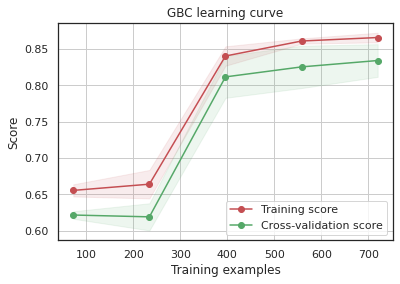

In [438]:
# Gradient boosting - Learning Curve 
plot_learning_curve(estimator = gsGBC.best_estimator_,title = "GBC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

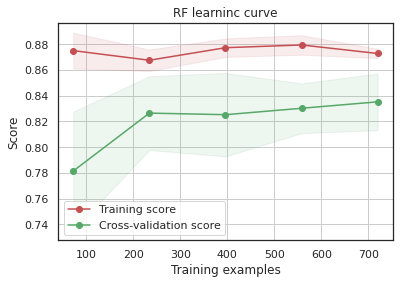

In [439]:
# Random Forest - Learning Curve
plot_learning_curve(estimator = gsRFC.best_estimator_ ,title = "RF learninc curve",
                    X = X_train, y = Y_train, cv = K_fold);

In [441]:
# Logistic Regression - Learning Curve    gsLRM.best_estimator_
#plot_learning_curve(estimator = Log_Model ,title = "Logistic Regression - Learning Curve",
#                    X = X_train, y = Y_train, cv = K_fold);

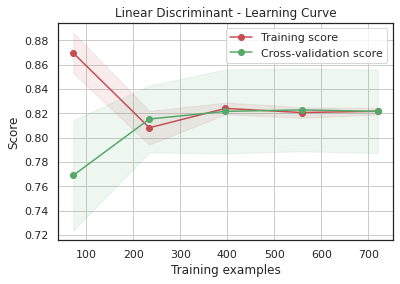

In [442]:
# Linear Discriminant Analysis - Learning Curve
plot_learning_curve(estimator = gsLDA.best_estimator_ ,title = "Linear Discriminant - Learning Curve",
                    X = X_train, y = Y_train, cv = K_fold);

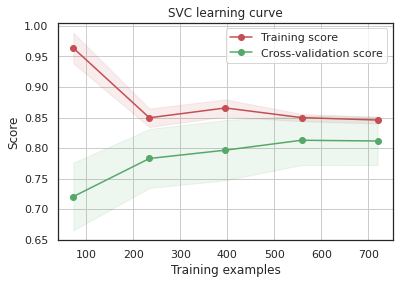

In [443]:
# Support Vector Machine - Learning Curve
plot_learning_curve(estimator = gsSVMC.best_estimator_,title = "SVC learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

# Ensemble modeling

In [452]:
#about 84%
VotingPredictor = VotingClassifier(estimators =
                           [
                            #('lda', LDA_best), 
                            ('gbc', GBC_best)
                           ],
                           voting='soft', n_jobs = 4)

# 82.97%
# VotingPredictor = VotingClassifier(estimators =
#                            [ ('rfc', RFC_best), 
#                             ('svc', SVMC_best),
#                             ('gbc', GBC_best),
#                             ('lda', LDA_best),
#                             ('lrm', LRM_best)],
#                            voting='soft', n_jobs = 4)

VotingPredictor = VotingPredictor.fit(X_train, Y_train)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv = K_fold,
                       n_jobs = 4, scoring = 'accuracy')

print(scores)
print(round(np.mean(scores)*100, 2))

[0.80246914 0.8        0.8        0.85       0.8625     0.8125
 0.85       0.825      0.8875     0.875     ]
83.65


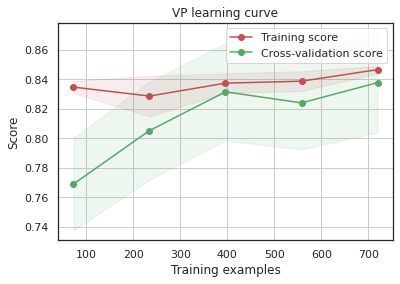

In [453]:
# Voting Predictor - Learning Curve
plot_learning_curve(estimator = VotingPredictor, title = "VP learning curve",
                    X = X_train, y = Y_train, cv = K_fold);

## Submit Predictor 

In [454]:
Predictive_Model = pd.DataFrame({
        "PassengerId": TestPassengerID,
        "Survived": VotingPredictor.predict(test_new)})

Predictive_Model.to_csv('number_1.csv', index=False)

In [455]:
# Let's look inside
submission = pd.read_csv('number_1.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
